# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import math
import csv
from datetime import datetime

# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode()

# Setup matplotlib to display in notebook:
%matplotlib inline

py.sign_in('mariapichardo', 'efxdg3vty3')

In [2]:

## Load the data into a DataFrame
# pd.read_csv()

df = pd.read_csv('/Users/mariapichardo/DSI-NYC-2/projects/projects-weekly/project-03/starter-code/Iowa_Liquor_sales_sample_10pct.csv')
df.head(3)

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

Date  Store Number         City Zip Code  County Number      County  \
0  11/04/2015          3717       SUMNER    50674            9.0      Bremer   
1  03/02/2016          2614    DAVENPORT    52807           82.0       Scott   
2  02/11/2016          2106  CEDAR FALLS    50613            7.0  Black Hawk   

    Category              Category Name  Vendor Number  Item Number  \
0  1051100.0           APRICOT BRANDIES             55        54436   
1  1011100.0           BLENDED WHISKIES            395        27605   
2  1011200.0  STRAIGHT BOURBON WHISKIES             65        19067   

            Item Description  Bottle Volume (ml) State Bottle Cost  \
0  Mr. Boston Apricot Brandy                 750             $4.50   
1                    Tin Cup                 750            $13.75   
2                   Jim Beam                1000            $12.59   

  State Bottle Retail  Bottles Sold Sale (Dollars)  Volume Sold (Liters)  \
0               $6.75            12         $81.00                   9.0   
1              $20.63             2         $41.26                   1.5   
2              $18.89            24        $453.36                  24.0   

   Volume Sold (Gallons)  
0                   2.38  
1                   0.40  
2                   6.34

In [3]:
#df.info() or 
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [4]:
# Rename columns - eliminate spaces and parenthesis in column names

df.columns = [x.replace(" ", "") if ' ' in x else x \
              for x in df.columns]

df.columns = [x.replace("(", "") if '(' in x else x \
              for x in df.columns]

df.columns = [x.replace(")", "") if ')' in x else x \
              for x in df.columns]

df.columns = [x.sentence.split() if ' ' in x else x \
              for x in df.columns]
df.columns
#df.head(3)


Index([u'Date', u'StoreNumber', u'City', u'ZipCode', u'CountyNumber',
       u'County', u'Category', u'CategoryName', u'VendorNumber', u'ItemNumber',
       u'ItemDescription', u'BottleVolumeml', u'StateBottleCost',
       u'StateBottleRetail', u'BottlesSold', u'SaleDollars',
       u'VolumeSoldLiters', u'VolumeSoldGallons'],
      dtype='object')

In [5]:
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")
df.columns
#df['Date'] = df['Date'].apply(pd.to_datetime)
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df.head(3)

Date  StoreNumber         City ZipCode  CountyNumber      County  \
0 2015-11-04         3717       SUMNER   50674           9.0      Bremer   
1 2016-03-02         2614    DAVENPORT   52807          82.0       Scott   
2 2016-02-11         2106  CEDAR FALLS   50613           7.0  Black Hawk   

    Category               CategoryName  VendorNumber  ItemNumber  \
0  1051100.0           APRICOT BRANDIES            55       54436   
1  1011100.0           BLENDED WHISKIES           395       27605   
2  1011200.0  STRAIGHT BOURBON WHISKIES            65       19067   

             ItemDescription  BottleVolumeml StateBottleCost  \
0  Mr. Boston Apricot Brandy             750           $4.50   
1                    Tin Cup             750          $13.75   
2                   Jim Beam            1000          $12.59   

  StateBottleRetail  BottlesSold SaleDollars  VolumeSoldLiters  \
0             $6.75           12      $81.00               9.0   
1            $20.63            2      $41.26               1.5   
2            $18.89           24     $453.36              24.0   

   VolumeSoldGallons  Year  Month  
0               2.38  2015     11  
1               0.40  2016      3  
2               6.34  2016      2

In [6]:
#df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")
#df["Date"].head()
print 'Records for 2015', len(df[df['Year']==2015])
print 'Records for 2016', len(df[df['Year']==2016])
#df['Year'].unique()
#df.loc['City']
#df[['City', 'Year']]
#dfp_feat.info()


Records for 2015 218594
Records for 2016 52361


In [7]:
df['ZipCode'].nunique()

415

In [8]:
df['ZipCode'].unique()[0:-400]


array(['50674', '52807', '50613', '50010', '50421', '52402', '52501',
       '50428', '50035', '52332', '50265', '52577', '52806', '52656',
       '52241'], dtype=object)

In [9]:
df.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                      object
CountyNumber                float64
County                       object
Category                    float64
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost              object
StateBottleRetail            object
BottlesSold                   int64
SaleDollars                  object
VolumeSoldLiters            float64
VolumeSoldGallons           float64
Year                          int64
Month                         int64
dtype: object

In [10]:

# dataframe for rows with NaNs in any cells

dfnan = df[pd.isnull(df).any(axis = 1)]
len (dfnan)
dfnan.head()

Date  StoreNumber          City ZipCode  CountyNumber County  \
135 2016-01-20         5222  CEDAR RAPIDS   52402           NaN    NaN   
198 2016-03-02         3820    SIOUX CITY   51103           NaN    NaN   
272 2016-03-21         4222     EVANSDALE   50707           NaN    NaN   
290 2016-03-21         5236       ANAMOSA   52205           NaN    NaN   
321 2016-02-23         4203       WAVERLY   50677           NaN    NaN   

      Category             CategoryName  VendorNumber  ItemNumber  \
135  1051010.0  AMERICAN GRAPE BRANDIES           115       53214   
198  1032080.0           IMPORTED VODKA            35       34359   
272  1062300.0             FLAVORED RUM           370       42716   
290  1081600.0          WHISKEY LIQUEUR           421       64868   
321  1051100.0         APRICOT BRANDIES           434       55084   

                     ItemDescription  BottleVolumeml StateBottleCost  \
135  Paul Masson Grande Amber Brandy             375           $3.22   
198                 Grey Goose Vodka             200           $5.00   
272               Malibu Coconut Rum             750           $7.49   
290        Fireball Cinnamon Whiskey            1750          $15.33   
321      Paramount Blackberry Brandy             375           $3.55   

    StateBottleRetail  BottlesSold SaleDollars  VolumeSoldLiters  \
135             $4.83           24     $115.92              9.00   
198             $7.50           12      $90.00              2.40   
272            $11.24            3      $33.72              2.25   
290            $23.00            6     $138.00             10.50   
321             $5.33           24     $127.92              9.00   

     VolumeSoldGallons  Year  Month  
135               2.38  2016      1  
198               0.63  2016      3  
272               0.59  2016      3  
290               2.77  2016      3  
321               2.38  2016      2

In [11]:
#Columns with "NaN" 

nanlist = []

for col in df.columns:
    x = sum(pd.isnull(df[col]))
    if x != 0:
        nanlist.append(col)
        print col, x

CountyNumber 1077
County 1077
Category 68
CategoryName 632


In [12]:
# from dfnan with null counties list the cities
city_with_nan_counties = list(dfnan['City'].unique())

city_with_nan_counties

['CEDAR RAPIDS',
 'SIOUX CITY',
 'EVANSDALE',
 'ANAMOSA',
 'WAVERLY',
 'HAMPTON',
 'DES MOINES',
 'WATERLOO',
 'BELMOND',
 'MASON CITY',
 'CORALVILLE',
 'DAVENPORT',
 'SIGOURNEY',
 'CLINTON',
 'NORWALK',
 'SIBLEY',
 'CLARINDA',
 'DUBUQUE',
 'IOWA FALLS',
 'AMES',
 'NORTH LIBERTY',
 'WINDSOR HEIGHTS',
 'PLEASANTVILLE',
 'STORM LAKE',
 'ALTOONA',
 'WEST BURLINGTON',
 'MOUNT PLEASANT',
 'URBANDALE',
 'DUNLAP',
 'ATLANTIC',
 'CHARITON',
 'ANKENY',
 'MUSCATINE',
 'CEDAR FALLS',
 'CRESCO',
 'GRINNELL',
 'WESLEY',
 'MOUNT VERNON',
 'COUNCIL BLUFFS',
 'NORTHWOOD',
 'ACKLEY',
 'GREENFIELD',
 'ROCKWELL',
 'CLIVE',
 'JEFFERSON',
 'BURLINGTON',
 'HARLAN',
 'FORT DODGE',
 'WASHINGTON',
 'LAMONI',
 'MARSHALLTOWN',
 'BOONE',
 'OELWEIN',
 'CLEAR LAKE',
 'ALBIA',
 'PACIFIC JUNCTION',
 'WEST BRANCH',
 'OSKALOOSA',
 'WEBSTER CITY',
 'ROCK RAPIDS',
 'WEST DES MOINES',
 'OTTUWMA',
 'NEWTON',
 'CENTERVILLE',
 'IOWA CITY',
 'JOHNSTON',
 'TABOR',
 'AUDUBON',
 'LANSING',
 'SEYMOUR',
 'ELKADER',
 'GUTTENBERG',


In [13]:
#Get the county value for the cities above from records that belong to the same city where county is populated
citydict = {}

for i in city_with_nan_counties:
    county_d = {x for x in df[df['City']==i]['County'] if x > 0} 
    county_n = {x for x in df[df['City']==i]['CountyNumber'] if x > 0}
    citydict[i] = [list(county_d), list(county_n)]

#citydict

In [14]:
## Populate Empty counties

for x in citydict:
    try:
        df.loc[df['City'] == x, 'County'] = citydict[x][0][0]
        df.loc[df['City'] == x, "CountyNumber"] = citydict[x][1][0]
    except:
        pass

In [15]:
dfnan = df[pd.isnull(df[['County','CountyNumber']]).any(axis = 1)]

dfnan['City'].unique()

array(['TABOR', 'SEYMOUR', 'RUNNELLS'], dtype=object)

In [16]:

if df.dtypes.ZipCode != 'int':
    check_zip = df[df['ZipCode']=='712-2']

check_zip['City'].unique()



array(['DUNLAP'], dtype=object)

In [17]:
#Dunlap Zip code: 51529
# replacing cells in ZipCode for Dunlap city that contained "712-2" with "51529"
df['ZipCode'] = df['ZipCode'].replace('712-2', '51529')

In [18]:
df['ZipCode'] = df['ZipCode'].astype(int)

In [19]:
df['ZipCode']

0         50674
1         52807
2         50613
3         50010
4         50421
5         52402
6         52501
7         50428
8         50035
9         52332
10        50265
11        52577
12        52806
13        52656
14        52241
15        50674
16        50703
17        52577
18        50208
19        52807
20        52402
21        52342
22        51250
23        50401
24        52402
25        51351
26        52246
27        51501
28        50111
29        52245
          ...  
270925    50702
270926    50009
270927    50320
270928    52240
270929    52778
270930    52402
270931    50595
270932    50208
270933    50010
270934    51104
270935    50310
270936    52404
270937    50801
270938    52405
270939    52233
270940    52544
270941    52253
270942    52240
270943    50010
270944    50311
270945    50310
270946    50322
270947    50111
270948    52245
270949    52405
270950    50316
270951    51445
270952    50702
270953    52655
270954    50322
Name: ZipCode, dtype: in

In [20]:
df['CountyNumber'].unique()
df['CountyNumber'] = df['CountyNumber'].replace('nan', '0')
df['CountyNumber'] = df['CountyNumber'].astype(int)
df.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                       int64
CountyNumber                  int64
County                       object
Category                    float64
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost              object
StateBottleRetail            object
BottlesSold                   int64
SaleDollars                  object
VolumeSoldLiters            float64
VolumeSoldGallons           float64
Year                          int64
Month                         int64
dtype: object

In [21]:
df['Category'].unique()
df['Category'] = df['Category'].replace('nan', '0')
df['Category'] = df['Category'].astype(int)
df.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                       int64
CountyNumber                  int64
County                       object
Category                      int64
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost              object
StateBottleRetail            object
BottlesSold                   int64
SaleDollars                  object
VolumeSoldLiters            float64
VolumeSoldGallons           float64
Year                          int64
Month                         int64
dtype: object

In [22]:
if df.dtypes.StateBottleCost != 'float64':
    df['StateBottleCost'] = [x.replace("$", "0") if '$' in x else x for x in df['StateBottleCost']]
    df['StateBottleCost'] = df['StateBottleCost'].astype(float)

if df.dtypes.StateBottleRetail != 'float64':
    df['StateBottleRetail'] = [x.replace("$", "0") if '$' in x else x for x in df['StateBottleRetail']]
    df['StateBottleRetail'] = df['StateBottleRetail'].astype(float)

if df.dtypes.SaleDollars != 'float64':
    df['SaleDollars'] = [x.replace("$", "0") if '$' in x else x for x in df['SaleDollars']]
    df['SaleDollars'] = df['SaleDollars'].astype(float)


In [23]:
df.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                       int64
CountyNumber                  int64
County                       object
Category                      int64
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost             float64
StateBottleRetail           float64
BottlesSold                   int64
SaleDollars                 float64
VolumeSoldLiters            float64
VolumeSoldGallons           float64
Year                          int64
Month                         int64
dtype: object

In [24]:
# This validates calculate profit column - we have cost and retail price

df['TotalDolBotStateCost'] = df['BottlesSold'] * df['StateBottleCost']  # Based on Cost
df['TotalDolBotStateRet'] = df['BottlesSold'] * df['StateBottleRetail'] # Based on retail price 
df['Profit'] = df['SaleDollars'] - df['TotalDolBotStateCost'] #profit calculation

In [25]:
# This validates the SaleDollars column - compare with calculates dollars based on retail price

diff = df[df['TotalDolBotStateRet'] - df['SaleDollars']!= 0]
#print 
#df['TotalDolBotStateRet'][4]
#df['SaleDollars'][4]
#diff.head(3)
df.head(10)

Date  StoreNumber          City  ZipCode  CountyNumber       County  \
0 2015-11-04         3717        SUMNER    50674             9       Bremer   
1 2016-03-02         2614     DAVENPORT    52807            82        Scott   
2 2016-02-11         2106   CEDAR FALLS    50613             7   Black Hawk   
3 2016-02-03         2501          AMES    50010            85        Story   
4 2015-08-18         3654       BELMOND    50421            99       Wright   
5 2015-04-20         2569  CEDAR RAPIDS    52402            57         Linn   
6 2015-08-05         2596       OTTUMWA    52501            90      Wapello   
7 2015-06-25         3456    CLEAR LAKE    50428            17  Cerro Gordo   
8 2016-01-04         4757     BONDURANT    50035            77         Polk   
9 2015-11-10         4346    SHELLSBURG    52332             6       Benton   

   Category               CategoryName  VendorNumber  ItemNumber   ...    \
0   1051100           APRICOT BRANDIES            55       54436   ...     
1   1011100           BLENDED WHISKIES           395       27605   ...     
2   1011200  STRAIGHT BOURBON WHISKIES            65       19067   ...     
3   1071100         AMERICAN COCKTAILS           395       59154   ...     
4   1031080             VODKA 80 PROOF           297       35918   ...     
5   1041100          AMERICAN DRY GINS           205       31473   ...     
6   1051010    AMERICAN GRAPE BRANDIES            85       52806   ...     
7   1012100          CANADIAN WHISKIES            65       10628   ...     
8   1032080             IMPORTED VODKA           370       34006   ...     
9   1081315          CINNAMON SCHNAPPS            65       82610   ...     

  StateBottleRetail  BottlesSold  SaleDollars  VolumeSoldLiters  \
0              6.75           12        81.00              9.00   
1             20.63            2        41.26              1.50   
2             18.89           24       453.36             24.00   
3             14.25            6        85.50             10.50   
4             10.80           12       129.60             21.00   
5             19.98            6       119.88             10.50   
6              9.99            3        29.97              2.25   
7             23.63            2        47.26              3.50   
8             17.24            4        68.96              3.00   
9             11.43            2        22.86              2.00   

   VolumeSoldGallons  Year  Month  TotalDolBotStateCost  TotalDolBotStateRet  \
0               2.38  2015     11                 54.00                81.00   
1               0.40  2016      3                 27.50                41.26   
2               6.34  2016      2                302.16               453.36   
3               2.77  2016      2                 57.00                85.50   
4               5.55  2015      8                 86.40               129.60   
5               2.77  2015      4                 79.92               119.88   
6               0.59  2015      8                 19.98                29.97   
7               0.92  2015      6                 31.50                47.26   
8               0.79  2016      1                 45.96                68.96   
9               0.53  2015     11                 15.24                22.86   

   Profit  
0   27.00  
1   13.76  
2  151.20  
3   28.50  
4   43.20  
5   39.96  
6    9.99  
7   15.76  
8   23.00  
9    7.62  

[10 rows x 23 columns]

In [26]:
df.head(3)

Date  StoreNumber         City  ZipCode  CountyNumber      County  \
0 2015-11-04         3717       SUMNER    50674             9      Bremer   
1 2016-03-02         2614    DAVENPORT    52807            82       Scott   
2 2016-02-11         2106  CEDAR FALLS    50613             7  Black Hawk   

   Category               CategoryName  VendorNumber  ItemNumber   ...    \
0   1051100           APRICOT BRANDIES            55       54436   ...     
1   1011100           BLENDED WHISKIES           395       27605   ...     
2   1011200  STRAIGHT BOURBON WHISKIES            65       19067   ...     

  StateBottleRetail  BottlesSold  SaleDollars  VolumeSoldLiters  \
0              6.75           12        81.00               9.0   
1             20.63            2        41.26               1.5   
2             18.89           24       453.36              24.0   

   VolumeSoldGallons  Year  Month  TotalDolBotStateCost  TotalDolBotStateRet  \
0               2.38  2015     11                 54.00                81.00   
1               0.40  2016      3                 27.50                41.26   
2               6.34  2016      2                302.16               453.36   

   Profit  
0   27.00  
1   13.76  
2  151.20  

[3 rows x 23 columns]

In [27]:
#created DataFrame with categories to check info integrity and for future reference

print 'no. of categories ', df['Category'].nunique()
print 'no. of categories desc ', df['CategoryName'].nunique()
category_df = df[['Category', 'CategoryName']]
category_df = category_df.drop_duplicates()
category_df = category_df.sort_values(by='Category')
category_df = category_df.reset_index(drop=True)
len(category_df)
category_df


no. of categories  84
no. of categories desc  71


Category                        CategoryName
0          0                                 NaN
1    1011100                    BLENDED WHISKIES
2    1011200           STRAIGHT BOURBON WHISKIES
3    1011250      SINGLE BARREL BOURBON WHISKIES
4    1011300                  TENNESSEE WHISKIES
5    1011400             BOTTLED IN BOND BOURBON
6    1011500               STRAIGHT RYE WHISKIES
7    1011600                       CORN WHISKIES
8    1011700                                 NaN
9    1012100                   CANADIAN WHISKIES
10   1012200                     SCOTCH WHISKIES
11   1012210                  SINGLE MALT SCOTCH
12   1012300                      IRISH WHISKIES
13   1012400                     JAPANESE WHISKY
14   1022100                             TEQUILA
15   1022200                                 NaN
16   1031080                      VODKA 80 PROOF
17   1031090                   OTHER PROOF VODKA
18   1031100                     100 PROOF VODKA
19   1031110                     LOW PROOF VODKA
20   1031200                      VODKA FLAVORED
21   1032080                      IMPORTED VODKA
22   1032100                                 NaN
23   1032200               IMPORTED VODKA - MISC
24   1041100                   AMERICAN DRY GINS
25   1041150                       FLAVORED GINS
26   1041200                  AMERICAN SLOE GINS
27   1042100                   IMPORTED DRY GINS
28   1051010             AMERICAN GRAPE BRANDIES
29   1051100                    APRICOT BRANDIES
..       ...                                 ...
54   1081300                 PEPPERMINT SCHNAPPS
55   1081305                      APPLE SCHNAPPS
56   1081312               BUTTERSCOTCH SCHNAPPS
57   1081315                   CINNAMON SCHNAPPS
58   1081317                      GRAPE SCHNAPPS
59   1081330                      PEACH SCHNAPPS
60   1081335                  RASPBERRY SCHNAPPS
61   1081340                  ROOT BEER SCHNAPPS
62   1081350                  SPEARMINT SCHNAPPS
63   1081355                 STRAWBERRY SCHNAPPS
64   1081365             TROPICAL FRUIT SCHNAPPS
65   1081370                 WATERMELON SCHNAPPS
66   1081380              MISCELLANEOUS SCHNAPPS
67   1081390                   IMPORTED SCHNAPPS
68   1081400                          TRIPLE SEC
69   1081500                          ROCK & RYE
70   1081600                     WHISKEY LIQUEUR
71   1081700         DISTILLED SPIRITS SPECIALTY
72   1081900  MISC. AMERICAN CORDIALS & LIQUEURS
73   1082010                 AMARETTO - IMPORTED
74   1082015                   IMPORTED AMARETTO
75   1082100                                 NaN
76   1082200                                 NaN
77   1082900  MISC. IMPORTED CORDIALS & LIQUEURS
78   1091100                                 NaN
79   1091300                                 NaN
80   1092100                                 NaN
81   1101100                    AMERICAN ALCOHOL
82   1501100          HIGH PROOF BEER - AMERICAN
83   1701100      DECANTERS & SPECIALTY PACKAGES

[84 rows x 2 columns]

In [28]:
#created DataFrame with county/county number to check info integrity and for future reference

print 'no. of CountyNumber ', df['CountyNumber'].nunique()
print 'no. of County ', df['County'].nunique()
county_df = df[['CountyNumber', 'County']]
county_df = county_df.drop_duplicates()
len(county_df)
county_df['CountyNumber'] = county_df['CountyNumber'].astype(int)
county_df = county_df.sort_values(by='CountyNumber')
county_df = county_df.reset_index(drop=True)
county_df


no. of CountyNumber  100
no. of County  99


CountyNumber         County
0               0            NaN
1               1          Adair
2               2          Adams
3               3      Allamakee
4               4      Appanoose
5               5        Audubon
6               6         Benton
7               7     Black Hawk
8               8          Boone
9               9         Bremer
10             10       Buchanan
11             11    Buena Vista
12             12         Butler
13             13        Calhoun
14             14        Carroll
15             15           Cass
16             16          Cedar
17             17    Cerro Gordo
18             18       Cherokee
19             19      Chickasaw
20             20         Clarke
21             21           Clay
22             22        Clayton
23             23        Clinton
24             24       Crawford
25             25         Dallas
26             25           Polk
27             26          Davis
28             27        Decatur
29             28       Delaware
..            ...            ...
73             70      Muscatine
74             71        O'Brien
75             72        Osceola
76             73           Page
77             74      Palo Alto
78             75       Plymouth
79             76     Pocahontas
80             77           Polk
81             78  Pottawattamie
82             79      Poweshiek
83             80       Ringgold
84             81            Sac
85             82          Scott
86             83         Shelby
87             84          Sioux
88             85          Story
89             86           Tama
90             87         Taylor
91             88          Union
92             89      Van Buren
93             90        Wapello
94             91         Warren
95             92     Washington
96             93          Wayne
97             94        Webster
98             95      Winnebago
99             96     Winneshiek
100            97       Woodbury
101            98          Worth
102            99         Wright

[103 rows x 2 columns]

In [29]:
# Now that you have a DF for County find the countynumber for null missing counties
#df[df['City'].isin({'TABOR', 'SEYMOUR', 'RUNNELLS'})]
print county_df[county_df['County'].str.upper().isin({'FREMONT', 'WAYNE', 'POLK'})]

print 'No of records with Polk 25', len (df[df['CountyNumber']==25])
print 'No of records with Polk 77', len (df[df['CountyNumber']==77])




    CountyNumber   County
26            25     Polk
37            36  Fremont
80            77     Polk
96            93    Wayne
No of records with Polk 25 10055
No of records with Polk 77 41326


In [30]:
# Unify CountyCode for Polk County
df['CountyNumber'] = df['CountyNumber'].replace(25, 77)

In [31]:
# Update null counties manually for 'TABOR', 'SEYMOUR', 'RUNNELLS' records with empty counties

df.loc[df['City'] == 'TABOR', 'County'] = 'Fremont'
df.loc[df['City'] == 'TABOR', 'CountyNumber'] = 36
df.loc[df['City'] == 'RUNNELLS', 'County'] = 'Polk'
df.loc[df['City'] == 'RUNNELLS', 'CountyNumber'] = 77
df.loc[df['City'] == 'SEYMOUR', 'County'] = 'Wayne'
df.loc[df['City'] == 'SEYMOUR', 'CountyNumber'] = 93

#verify if there still more null values for county
dfnan = df[pd.isnull(df[['County','CountyNumber']]).any(axis = 1)]
dfnan

Empty DataFrame
Columns: [Date, StoreNumber, City, ZipCode, CountyNumber, County, Category, CategoryName, VendorNumber, ItemNumber, ItemDescription, BottleVolumeml, StateBottleCost, StateBottleRetail, BottlesSold, SaleDollars, VolumeSoldLiters, VolumeSoldGallons, Year, Month, TotalDolBotStateCost, TotalDolBotStateRet, Profit]
Index: []

[0 rows x 23 columns]

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [32]:
df['BottleVolumeml'].describe()

count    270955.000000
mean        924.830341
std         493.088489
min          50.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: BottleVolumeml, dtype: float64

In [33]:
print "The most common botle volume is ", df['BottleVolumeml'].median(), 'ML'

The most common botle volume is  750.0 ML


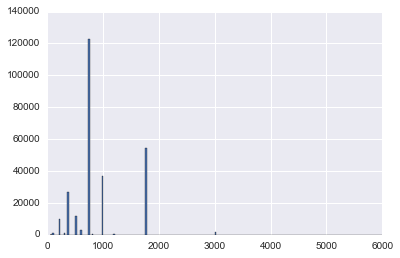

In [34]:
df['BottleVolumeml'].hist(bins = 200)

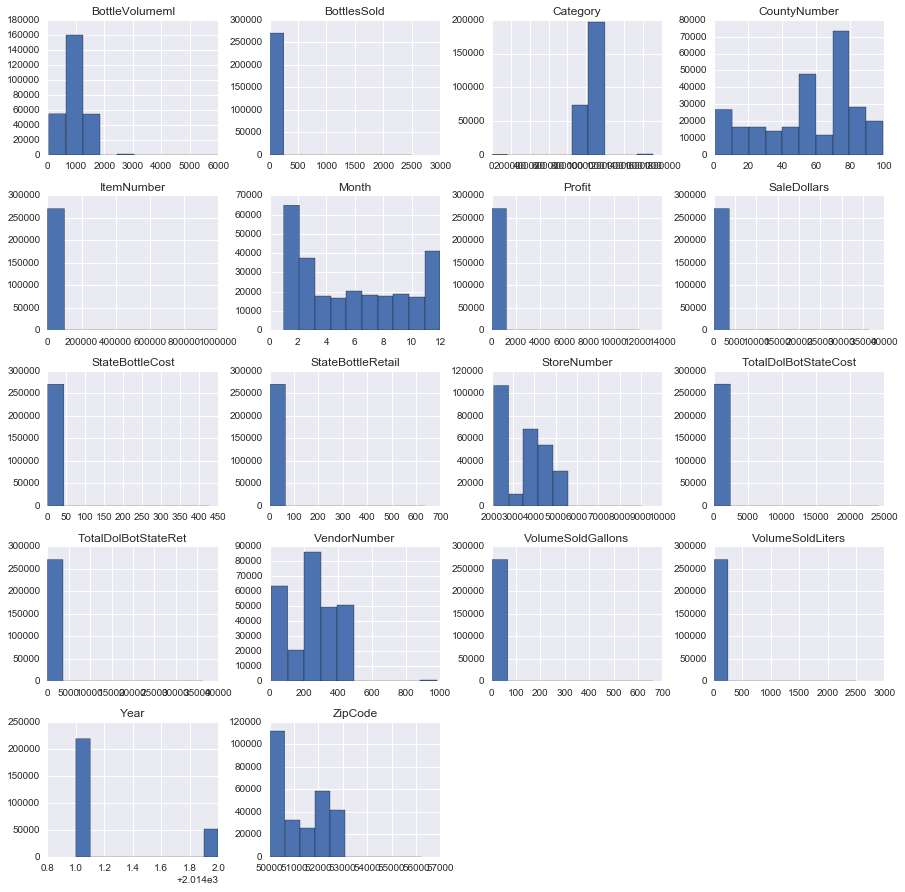

In [35]:
# Overview of histograms

df.hist(figsize=(15,15));


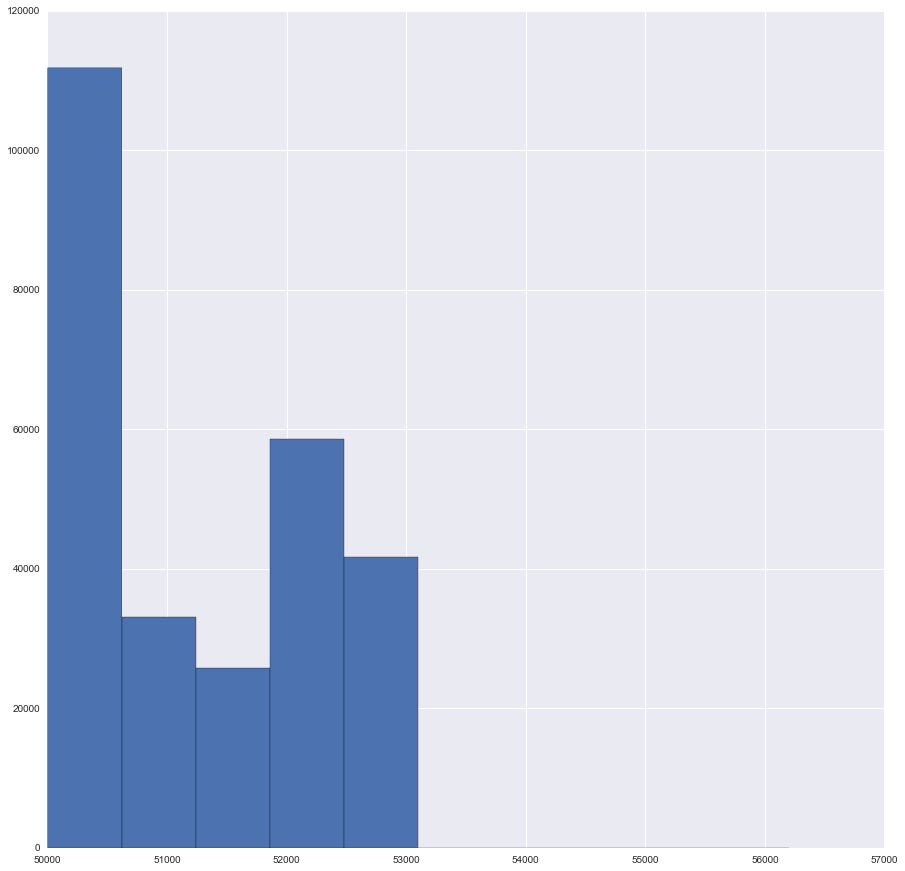

In [36]:
# Overview of histograms

df['ZipCode'].hist(figsize=(15,15));



In [37]:
df['City'].nunique()

385

In [38]:
df.dtypes

Date                    datetime64[ns]
StoreNumber                      int64
City                            object
ZipCode                          int64
CountyNumber                     int64
County                          object
Category                         int64
CategoryName                    object
VendorNumber                     int64
ItemNumber                       int64
ItemDescription                 object
BottleVolumeml                   int64
StateBottleCost                float64
StateBottleRetail              float64
BottlesSold                      int64
SaleDollars                    float64
VolumeSoldLiters               float64
VolumeSoldGallons              float64
Year                             int64
Month                            int64
TotalDolBotStateCost           float64
TotalDolBotStateRet            float64
Profit                         float64
dtype: object

In [39]:
df.groupby(['StoreNumber', 'Month', 'Year', 'City', 'County', 'VendorNumber'])[ 'SaleDollars', \
                          'VolumeSoldGallons', 'BottlesSold', 'StateBottleRetail' ].agg([sum, max, min, np.mean], 
                                                                                        margins=True).head(10)


SaleDollars  \
                                                                   sum   
StoreNumber Month Year City        County     VendorNumber               
2106        1     2015 CEDAR FALLS Black Hawk 35                601.08   
                                              55                940.44   
                                              65                388.95   
                                              192              1678.32   
                                              240               258.84   
                                              259               701.04   
                                              260              3520.14   
                                              305               225.00   
                                              322               180.00   
                                              370              1974.75   

                                                                              \
                                                                max      min   
StoreNumber Month Year City        County     VendorNumber                     
2106        1     2015 CEDAR FALLS Black Hawk 35             513.00    88.08   
                                              55             715.20    62.28   
                                              65             137.16    20.07   
                                              192           1678.32  1678.32   
                                              240            258.84   258.84   
                                              259            597.00   104.04   
                                              260            999.00    37.14   
                                              305            225.00   225.00   
                                              322            180.00   180.00   
                                              370            989.40     4.95   

                                                                       \
                                                                 mean   
StoreNumber Month Year City        County     VendorNumber              
2106        1     2015 CEDAR FALLS Black Hawk 35             300.5400   
                                              55             235.1100   
                                              65              97.2375   
                                              192           1678.3200   
                                              240            258.8400   
                                              259            350.5200   
                                              260            440.0175   
                                              305            225.0000   
                                              322            180.0000   
                                              370            493.6875   

                                                           VolumeSoldGallons  \
                                                                         sum   
StoreNumber Month Year City        County     VendorNumber                     
2106        1     2015 CEDAR FALLS Black Hawk 35                       12.68   
                                              55                       40.02   
                                              65                        9.51   
                                              192                      19.02   
                                              240                       2.38   
                                              259                      14.27   
                                              260                      32.69   
                                              305                       2.38   
                                              322                       2.38   
                                              370                      26.29   

                                                                

In [40]:
df[df['City']=='DES MOINES'].groupby(['City', 'Year'])[ 'SaleDollars', \
                          'VolumeSoldGallons', 'BottlesSold', 'StateBottleRetail' ].agg([sum, max, min, np.mean], 
                                                                                        margins=True).head(10)



SaleDollars                            VolumeSoldGallons  \
                        sum      max   min        mean               sum   
City       Year                                                            
DES MOINES 2015  3591167.75  36392.4  1.46  188.473168          59699.47   
           2016   814355.45  17820.0  2.94  174.380182          13477.38   

                                        BottlesSold                       \
                    max   min      mean         sum   max min       mean   
City       Year                                                            
DES MOINES 2015  348.71  0.03  3.133173      280125  1320   1  14.701637   
           2016  174.35  0.05  2.885949       65250   660   1  13.972163   

                StateBottleRetail                           
                              sum     max   min       mean  
City       Year                                             
DES MOINES 2015         286272.50  252.00  1.34  15.024273  
           2016          69921.42  336.24  1.34  14.972467

In [41]:
vendor_bycounty_df = df.groupby('County')['VendorNumber'].nunique().to_frame('TotalVendors')
vendor_bycounty_df = vendor_bycounty_df.sort_values(by='TotalVendors', ascending=False)
vendor_bycounty_df.reset_index(inplace=True)
vendor_bycounty_df[vendor_bycounty_df['County']=='Adair'] 



#df['StoreNumber'].unique()
#The vendor name
#The location data (zip code, county, city)
#The total sales for the year
#The total sales for each month (or at least for Jan-March for the first scenario)
#The total volume sold
#The total number of bottles sold
#The average price per bottle (perhaps useful for distinguishing store types)

County  TotalVendors
74  Adair            30

In [42]:
df.columns


Index([u'Date', u'StoreNumber', u'City', u'ZipCode', u'CountyNumber',
       u'County', u'Category', u'CategoryName', u'VendorNumber', u'ItemNumber',
       u'ItemDescription', u'BottleVolumeml', u'StateBottleCost',
       u'StateBottleRetail', u'BottlesSold', u'SaleDollars',
       u'VolumeSoldLiters', u'VolumeSoldGallons', u'Year', u'Month',
       u'TotalDolBotStateCost', u'TotalDolBotStateRet', u'Profit'],
      dtype='object')

In [43]:
stores_bycounty_df = df.groupby('County')['StoreNumber'].nunique().to_frame('TotalStores')
stores_bycounty_df = stores_bycounty_df.sort_values(by='TotalStores', ascending=False)
stores_bycounty_df.reset_index(inplace=True)
#stores_bycounty_df
stores_bycounty_df[stores_bycounty_df['County']=='Adair'] 

County  TotalStores
39  Adair            8

In [44]:
stores_bycity_df = df.groupby('City')['StoreNumber'].nunique().to_frame('TotalStores')
#sdf.groupby('letter')['length'].nunique().to_frame().head(3)
stores_bycity_df = stores_bycity_df.sort_values(by='TotalStores', ascending=False)
stores_bycity_df.reset_index(inplace=True)
#stores_bycity_df[stores_bycity_df['City']=='DES MOINES']
stores_bycity_df
##stores_bycity_df.columns


City  TotalStores
0         DES MOINES           89
1       CEDAR RAPIDS           77
2           WATERLOO           46
3          DAVENPORT           44
4     COUNCIL BLUFFS           42
5         SIOUX CITY           34
6    WEST DES MOINES           30
7            DUBUQUE           29
8          IOWA CITY           26
9               AMES           25
10            ANKENY           21
11         URBANDALE           18
12       CEDAR FALLS           17
13        FORT DODGE           16
14         MUSCATINE           15
15        CORALVILLE           14
16        MASON CITY           14
17        BURLINGTON           14
18        BETTENDORF           12
19      MARSHALLTOWN           12
20           CLINTON           11
21            MARION           11
22             CLIVE           10
23          JOHNSTON           10
24        STORM LAKE           10
25           OTTUMWA           10
26           ALTOONA            9
27             BOONE            9
28     NORTH LIBERTY            9
29         INDIANOLA            8
..               ...          ...
355         HUMESTON            1
356            DELHI            1
357         DELAWARE            1
358           DAYTON            1
359     NEW VIRGINIA            1
360       NEW SHARON            1
361            EARLY            1
362        EDDYVILLE            1
363   MECHANICSVILLE            1
364       FARMINGTON            1
365        MELBOURNE            1
366   MELCHER-DALLAS            1
367          MERRILL            1
368           FARLEY            1
369           MINDEN            1
370          FAIRFAX            1
371         FAIRBANK            1
372            EXIRA            1
373           EVERLY            1
374              ELY            1
375             ELMA            1
376          MORAVIA            1
377        ELLSWORTH            1
378            ELDON            1
379      MT PLEASANT            1
380        MT VERNON            1
381         EDGEWOOD            1
382           NASHUA            1
383            NEOLA            1
384          ZWINGLE            1

[385 rows x 2 columns]

In [45]:
df['StoreNumber'].nunique()

1400

In [46]:
df.groupby('County')["BottlesSold", "SaleDollars"].agg([sum]).head(3)

BottlesSold SaleDollars
                  sum         sum
County                           
Adair            4653    55581.34
Adams             955    12441.71
Allamakee        7452    99024.76

In [47]:
#summaries by ZipCode
totals_byZipCode3_df = df.groupby(['ZipCode', 'Year'])["BottlesSold"].agg({'TotalBottlesSold':sum})
totals_byZipCode3_df.reset_index(inplace=True)
totals_byZipCode3_df.stack(level=0, dropna=True)
totals_byZipCode3_df.head(3)

totals_byZipCode2_df = df.groupby(['ZipCode', 'Year'])["SaleDollars"].agg({'TotalSaleDollars':sum})
totals_byZipCode2_df.reset_index(inplace=True)
totals_byZipCode2_df.stack(level=0, dropna=True)
totals_byZipCode2_df.head(3)

totals_byZipCode1_df = df.groupby(['ZipCode', 'Year'])["StoreNumber"].agg({'TotalNoStores':lambda x: x.nunique()})
totals_byZipCode1_df.reset_index(inplace=True)
totals_byZipCode1_df.stack(level=0, dropna=True)
totals_byZipCode1_df.head(3)

totals_byZipCode4_df = df.groupby(['ZipCode', 'Year'])["Profit"].agg({'TotalProfitDollars':sum})
totals_byZipCode4_df.reset_index(inplace=True)
totals_byZipCode4_df.stack(level=0, dropna=True)
totals_byZipCode4_df.head(3)

#summaries by ZipCode . Merge Above dataframe to create a dataframe by ZipCode for plotting

best_stores_2015_ZipCode = pd.merge(pd.merge(\
pd.merge(totals_byZipCode1_df[totals_byZipCode1_df['Year']==2015],\
                  totals_byZipCode2_df[totals_byZipCode2_df['Year']==2015], on=['ZipCode','Year'])\
        ,totals_byZipCode3_df[totals_byZipCode3_df['Year']==2015] , on=(['ZipCode', 'Year'])),\
                                   totals_byZipCode4_df[totals_byZipCode4_df['Year']==2015] , on=(['ZipCode', 'Year'])).sort_values('ZipCode')
    
    
best_stores_2015_ZipCode.head(3)


best_stores_2016_ZipCode = pd.merge(pd.merge(\
pd.merge(totals_byZipCode1_df[totals_byZipCode1_df['Year']==2016],\
                  totals_byZipCode2_df[totals_byZipCode2_df['Year']==2016], on=['ZipCode','Year'])\
        ,totals_byZipCode3_df[totals_byZipCode3_df['Year']==2016] , on=(['ZipCode', 'Year'])),\
                                   totals_byZipCode4_df[totals_byZipCode4_df['Year']==2016] , on=(['ZipCode', 'Year'])).sort_values('ZipCode')
    
best_stores_2015_ZipCode.head(3)
    
#sort by total prfit to know the 10 more profitable counties YEAR 2015
best_stores_2015_ZipCode = best_stores_2015_ZipCode.sort(['TotalProfitDollars'], ascending=[0])
#best_stores_2015_ZipCode.head(3)
                             
#sort by total prfit to know the 10 more profitable counties YEAR 216

best_stores_2016_ZipCode = best_stores_2016_ZipCode.sort(['TotalProfitDollars'], ascending=[0])
#best_stores_2016_ZipCode.head(3)                             



/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [48]:
best_stores_2015_ZipCode.head(3)

ZipCode  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
94     50320  2015              9        1071059.83             69494   
90     50314  2015              6        1070054.58             72298   
357    52402  2015             28         981966.84             75594   

     TotalProfitDollars  
94            357269.15  
90            357011.44  
357           328277.18

In [49]:
best_stores_2016_ZipCode.head(3)

ZipCode  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
88     50314  2016              5         266415.58             18116   
92     50320  2016              9         235221.91             15454   
319    52240  2016             20         207061.75             16340   

     TotalProfitDollars  
88             88866.16  
92             78466.61  
319            69073.13

In [50]:
#summaries by city
totals_bycity3_df = df.groupby(['City', 'Year'])["BottlesSold"].agg({'TotalBottlesSold':sum})
totals_bycity3_df.reset_index(inplace=True)
totals_bycity3_df.stack(level=0, dropna=True)
totals_bycity3_df.head(3)

totals_bycity2_df = df.groupby(['City', 'Year'])["SaleDollars"].agg({'TotalSaleDollars':sum})
totals_bycity2_df.reset_index(inplace=True)
totals_bycity2_df.stack(level=0, dropna=True)
totals_bycity2_df.head(3)

totals_bycity1_df = df.groupby(['City', 'Year'])["StoreNumber"].agg({'TotalNoStores':lambda x: x.nunique()})
totals_bycity1_df.reset_index(inplace=True)
totals_bycity1_df.stack(level=0, dropna=True)
totals_bycity1_df.head(3)

totals_bycity4_df = df.groupby(['City', 'Year'])["Profit"].agg({'TotalProfitDollars':sum})
totals_bycity4_df.reset_index(inplace=True)
totals_bycity4_df.stack(level=0, dropna=True)
totals_bycity4_df.head(3)

#summaries by city . Merge Above dataframe to create a dataframe by city for plotting

best_stores_2015_city = pd.merge(pd.merge(\
pd.merge(totals_bycity1_df[totals_bycity1_df['Year']==2015],\
                  totals_bycity2_df[totals_bycity2_df['Year']==2015], on=['City','Year'])\
        ,totals_bycity3_df[totals_bycity3_df['Year']==2015] , on=(['City', 'Year'])),\
                                   totals_bycity4_df[totals_bycity4_df['Year']==2015] , on=(['City', 'Year'])).sort_values('City')
    
    
best_stores_2015_city.head(3)


best_stores_2016_city = pd.merge(pd.merge(\
pd.merge(totals_bycity1_df[totals_bycity1_df['Year']==2016],\
                  totals_bycity2_df[totals_bycity2_df['Year']==2016], on=['City','Year'])\
        ,totals_bycity3_df[totals_bycity3_df['Year']==2016] , on=(['City', 'Year'])),\
                                   totals_bycity4_df[totals_bycity4_df['Year']==2016] , on=(['City', 'Year'])).sort_values('City')
    
best_stores_2015_city.head(3)
    
#sort by total prfit to know the 10 more profitable counties YEAR 2015
best_stores_2015_city = best_stores_2015_city.sort(['TotalProfitDollars'], ascending=[0])
best_stores_2015_city.head(3)
                             
#sort by total prfit to know the 10 more profitable counties YEAR 216

best_stores_2016_city = best_stores_2016_city.sort(['TotalProfitDollars'], ascending=[0])
best_stores_2016_city.head(3)                             




/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



City  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
90    DES MOINES  2016             76         814355.45             65250   
51  CEDAR RAPIDS  2016             71         437361.85             34805   
81     DAVENPORT  2016             44         319680.64             30601   

    TotalProfitDollars  
90           271700.52  
51           145953.13  
81           106653.37

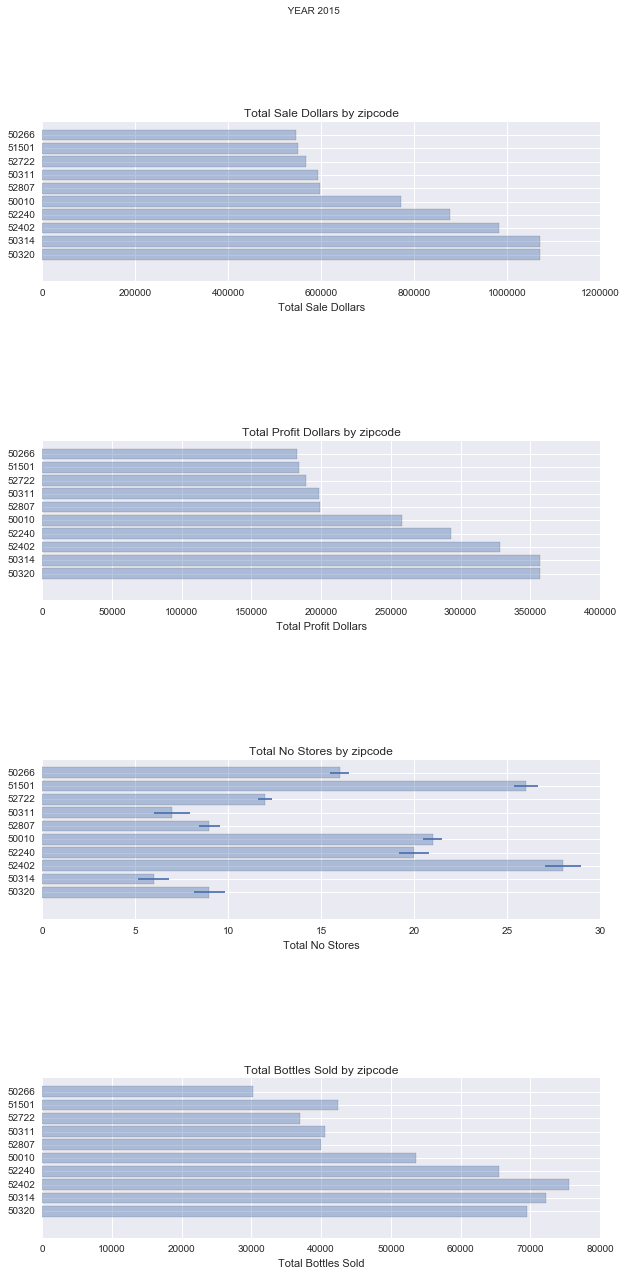

In [51]:
fig, axes = plt.subplots(4,1, figsize=(10,20))

plt.subplot(411)
plt.subplots_adjust(hspace=1)
zipcodes = best_stores_2015_ZipCode['ZipCode'].head(10).values
y_pos = np.arange(len(zipcodes))
performance = best_stores_2015_ZipCode['TotalSaleDollars'].head(10).values
error = np.random.rand(len(zipcodes))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, zipcodes)
plt.xlabel('Total Sale Dollars')
plt.title('Total Sale Dollars by zipcode')
plt.suptitle(' YEAR 2015')

plt.subplot(412)

zipcodes = best_stores_2015_ZipCode['ZipCode'].head(10).values
y_pos = np.arange(len(zipcodes))
performance = best_stores_2015_ZipCode['TotalProfitDollars'].head(10).values
error = np.random.rand(len(zipcodes))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, zipcodes)
plt.xlabel('Total Profit Dollars')
plt.title('Total Profit Dollars by zipcode')

plt.subplot(413)

zipcodes = best_stores_2015_ZipCode['ZipCode'].head(10).values
y_pos = np.arange(len(zipcodes))
performance = best_stores_2015_ZipCode['TotalNoStores'].head(10).values
error = np.random.rand(len(zipcodes))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, zipcodes)
plt.xlabel('Total No Stores')
plt.title('Total No Stores by zipcode')

plt.subplot(414)

zipcodes = best_stores_2015_ZipCode['ZipCode'].head(10).values
y_pos = np.arange(len(zipcodes))
performance = best_stores_2015_ZipCode['TotalBottlesSold'].head(10).values
error = np.random.rand(len(zipcodes))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, zipcodes)
plt.xlabel('Total Bottles Sold')
plt.title('Total Bottles Sold by zipcode')



In [52]:
best_stores_2015_ZipCode.head(10)

ZipCode  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
94     50320  2015              9        1071059.83             69494   
90     50314  2015              6        1070054.58             72298   
357    52402  2015             28         981966.84             75594   
322    52240  2015             20         876783.44             65499   
4      50010  2015             21         772044.25             53617   
407    52807  2015              9         596760.04             39971   
87     50311  2015              7         593241.84             40565   
385    52722  2015             12         566650.78             37030   
256    51501  2015             26         551026.67             42414   
81     50266  2015             16         545474.21             30248   

     TotalProfitDollars  
94            357269.15  
90            357011.44  
357           328277.18  
322           292865.76  
4             258178.25  
407           199324.51  
87            198192.62  
385           189199.99  
256           184031.18  
81            182647.29

In [53]:
#summaries by city
totals_bycity3_df = df.groupby(['City', 'Year'])["BottlesSold"].agg({'TotalBottlesSold':sum})
totals_bycity3_df.reset_index(inplace=True)
totals_bycity3_df.stack(level=0, dropna=True)
totals_bycity3_df.head(3)

totals_bycity2_df = df.groupby(['City', 'Year'])["SaleDollars"].agg({'TotalSaleDollars':sum})
totals_bycity2_df.reset_index(inplace=True)
totals_bycity2_df.stack(level=0, dropna=True)
totals_bycity2_df.head(3)

totals_bycity1_df = df.groupby(['City', 'Year'])["StoreNumber"].agg({'TotalNoStores':lambda x: x.nunique()})
totals_bycity1_df.reset_index(inplace=True)
totals_bycity1_df.stack(level=0, dropna=True)
totals_bycity1_df.head(3)

totals_bycity4_df = df.groupby(['City', 'Year'])["Profit"].agg({'TotalProfitDollars':sum})
totals_bycity4_df.reset_index(inplace=True)
totals_bycity4_df.stack(level=0, dropna=True)
totals_bycity4_df.head(3)

#summaries by city . Merge Above dataframe to create a dataframe by city for plotting

best_stores_2015_city = pd.merge(pd.merge(\
pd.merge(totals_bycity1_df[totals_bycity1_df['Year']==2015],\
                  totals_bycity2_df[totals_bycity2_df['Year']==2015], on=['City','Year'])\
        ,totals_bycity3_df[totals_bycity3_df['Year']==2015] , on=(['City', 'Year'])),\
                                   totals_bycity4_df[totals_bycity4_df['Year']==2015] , on=(['City', 'Year'])).sort_values('City')
    
    
best_stores_2015_city.head(3)


best_stores_2016_city = pd.merge(pd.merge(\
pd.merge(totals_bycity1_df[totals_bycity1_df['Year']==2016],\
                  totals_bycity2_df[totals_bycity2_df['Year']==2016], on=['City','Year'])\
        ,totals_bycity3_df[totals_bycity3_df['Year']==2016] , on=(['City', 'Year'])),\
                                   totals_bycity4_df[totals_bycity4_df['Year']==2016] , on=(['City', 'Year'])).sort_values('City')
    
best_stores_2015_city.head(3)
    
#sort by total prfit to know the 10 more profitable counties YEAR 2015
best_stores_2015_city = best_stores_2015_city.sort(['TotalProfitDollars'], ascending=[0])
best_stores_2015_city.head(3)
                             
#sort by total prfit to know the 10 more profitable counties YEAR 216

best_stores_2016_city = best_stores_2016_city.sort(['TotalProfitDollars'], ascending=[0])
best_stores_2016_city.head(3)                             



/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



City  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
90    DES MOINES  2016             76         814355.45             65250   
51  CEDAR RAPIDS  2016             71         437361.85             34805   
81     DAVENPORT  2016             44         319680.64             30601   

    TotalProfitDollars  
90           271700.52  
51           145953.13  
81           106653.37

In [54]:
#summaries by county
totals_bycounty3_df = df.groupby(['County', 'Year'])["BottlesSold"].agg({'TotalBottlesSold':sum})
totals_bycounty3_df.reset_index(inplace=True)
totals_bycounty3_df.stack(level=0, dropna=True)
totals_bycounty3_df.head(3)

County  Year  TotalBottlesSold
0  Adair  2015              3780
1  Adair  2016               873
2  Adams  2015               754

In [55]:
#summaries by county
totals_bycounty2_df = df.groupby(['County', 'Year'])["SaleDollars"].agg({'TotalSaleDollars':sum})
totals_bycounty2_df.reset_index(inplace=True)
totals_bycounty2_df.stack(level=0, dropna=True)
totals_bycounty2_df.head(3)

County  Year  TotalSaleDollars
0  Adair  2015          43747.18
1  Adair  2016          11834.16
2  Adams  2015          10245.14

In [56]:
totals_bycounty1_df = df.groupby(['County', 'Year'])["StoreNumber"].agg({'TotalNoStores':lambda x: x.nunique()})
totals_bycounty1_df.reset_index(inplace=True)
totals_bycounty1_df.stack(level=0, dropna=True)
totals_bycounty1_df.head(3)


County  Year  TotalNoStores
0  Adair  2015              8
1  Adair  2016              7
2  Adams  2015              1

In [57]:
totals_bycounty4_df = df.groupby(['County', 'Year'])["Profit"].agg({'TotalProfitDollars':sum})
totals_bycounty4_df.reset_index(inplace=True)
totals_bycounty4_df.stack(level=0, dropna=True)
totals_bycounty4_df.head(3)

County  Year  TotalProfitDollars
0  Adair  2015            14620.89
1  Adair  2016             3954.40
2  Adams  2015             3417.67

In [58]:
pd.merge(pd.merge(\
pd.merge(totals_bycounty1_df[totals_bycounty1_df['Year']==2015],\
                  totals_bycounty2_df[totals_bycounty2_df['Year']==2015], on=['County','Year'])\
        ,totals_bycounty3_df[totals_bycounty3_df['Year']==2015] , on=(['County', 'Year'])),\
                                   totals_bycounty4_df[totals_bycounty4_df['Year']==2015] , on=(['County', 'Year'])).sort_values('County')
    


County  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
0           Adair  2015              8          43747.18              3780   
1           Adams  2015              1          10245.14               754   
2       Allamakee  2015              6          79918.47              6020   
3       Appanoose  2015              6          77033.64              6419   
4         Audubon  2015              3          16429.26              1429   
5          Benton  2015              6          65334.19              5269   
6      Black Hawk  2015             72        1583084.01            142934   
7           Boone  2015             17         210778.48             16394   
8          Bremer  2015              9         167492.71             12551   
9        Buchanan  2015             15         240233.47             18795   
10    Buena Vista  2015             13         173802.25             12559   
11         Butler  2015              7          25516.37              2237   
12        Calhoun  2015              8          28576.62              2389   
13        Carroll  2015             11         269107.98             17964   
14           Cass  2015              9         102595.94              7619   
15          Cedar  2015              8          52590.04              4820   
16    Cerro Gordo  2015             20         570061.54             44715   
17       Cherokee  2015              7          71931.28              6047   
18      Chickasaw  2015              5          38866.37              2874   
19         Clarke  2015              6          67068.36              4631   
20           Clay  2015              8         145617.75             11259   
21        Clayton  2015             12          74237.89              5148   
22        Clinton  2015             17         342639.32             28130   
23       Crawford  2015              6         117664.05              8805   
24         Dallas  2015             13         210046.28             15399   
25          Davis  2015              1          11152.82               869   
26        Decatur  2015              5          15429.46              1424   
27       Delaware  2015              5          78857.69              5741   
28     Des Moines  2015             21         385644.38             31125   
29      Dickinson  2015             14         389510.91             27594   
..            ...   ...            ...               ...               ...   
69      Muscatine  2015             20         292375.73             22439   
70        O'Brien  2015             10         144714.05             10426   
71        Osceola  2015              2          24456.70              1729   
72           Page  2015              8         110867.32              8427   
73      Palo Alto  2015              8          55920.20              4125   
74       Plymouth  2015              8         137864.77             10253   
75     Pocahontas  2015              5          36171.25              2975   
76           Polk  2015            208        6667881.06            485742   
77  Pottawattamie  2015             52        1013367.23             76453   
78      Poweshiek  2015             14         138509.82             10137   
79       Ringgold  2015              3          15505.45              1075   
80            Sac  2015              7          53942.06              4293   
81          Scott  2015             54        1520533.95            133714   
82         Shelby  2015              4          92522.53              6632   
83          Sioux  2015              9         157514.32             10382   
84          Story  2015             38         887234.71             63579   
85           Tama  2015              5          60289.74              5009   
86         Taylor  2015              3          11765.89               936   
87          Union  2015              6          91964.12              6494   
88      Van Buren  2015          

In [59]:
#summaries by county . Merge ABove dataframe to create a dataframe by county for plotting

best_stores_2015_county = pd.merge(pd.merge(\
pd.merge(totals_bycounty1_df[totals_bycounty1_df['Year']==2015],\
                  totals_bycounty2_df[totals_bycounty2_df['Year']==2015], on=['County','Year'])\
        ,totals_bycounty3_df[totals_bycounty3_df['Year']==2015] , on=(['County', 'Year'])),\
                                   totals_bycounty4_df[totals_bycounty4_df['Year']==2015] , on=(['County', 'Year'])).sort_values('County')
    
    
best_stores_2015_county.head(3)


best_stores_2016_county = pd.merge(pd.merge(\
pd.merge(totals_bycounty1_df[totals_bycounty1_df['Year']==2016],\
                  totals_bycounty2_df[totals_bycounty2_df['Year']==2016], on=['County','Year'])\
        ,totals_bycounty3_df[totals_bycounty3_df['Year']==2016] , on=(['County', 'Year'])),\
                                   totals_bycounty4_df[totals_bycounty4_df['Year']==2016] , on=(['County', 'Year'])).sort_values('County')
    
best_stores_2015_county.head(3)
    

County  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
0      Adair  2015              8          43747.18              3780   
1      Adams  2015              1          10245.14               754   
2  Allamakee  2015              6          79918.47              6020   

   TotalProfitDollars  
0            14620.89  
1             3417.67  
2            26770.24

In [60]:
#sort by total prfit to know the 10 more profitable counties YEAR 2015
best_stores_2015_county = best_stores_2015_county.sort(['TotalProfitDollars'], ascending=[0])
best_stores_2015_county.head(3)

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



County  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
76     Polk  2015            208        6667881.06            485742   
56     Linn  2015            101        2606326.77            202959   
51  Johnson  2015             46        1617025.98            111841   

    TotalProfitDollars  
76          2228286.31  
56           870999.67  
51           540080.85

In [61]:
#sort by total prfit to know the 10 more profitable counties YEAR 216

best_stores_2016_county = best_stores_2016_county.sort(['TotalProfitDollars'], ascending=[0])
best_stores_2016_county.head(3)

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



County  Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
76        Polk  2016            190        1453973.39            110829   
56        Linn  2016             97         559145.18             44732   
6   Black Hawk  2016             66         356881.29             30719   

    TotalProfitDollars  
76           485144.50  
56           186598.26  
6            119080.98

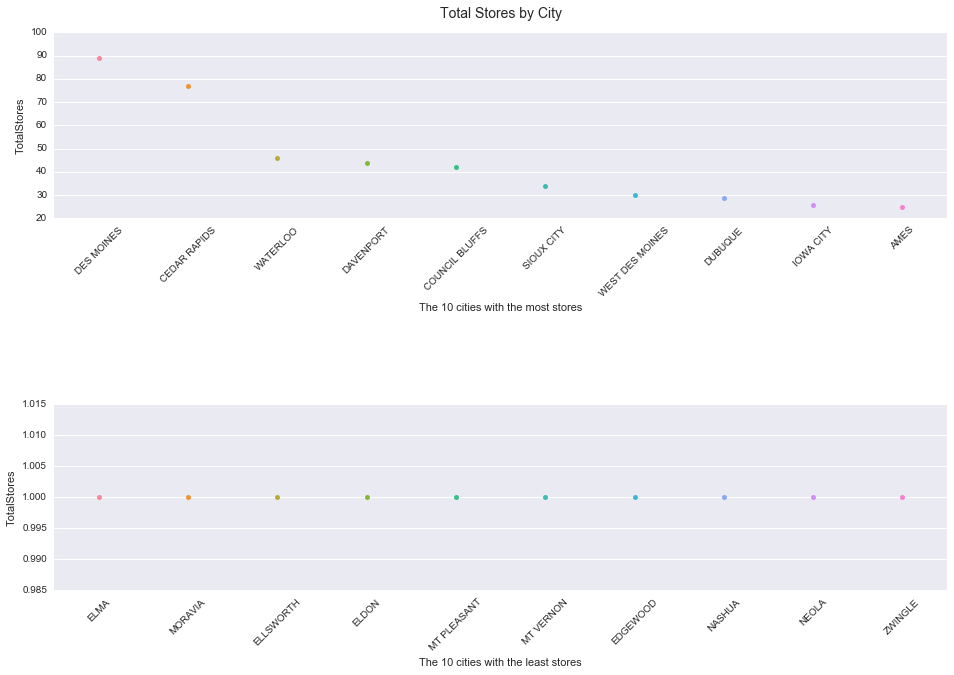

In [62]:
#plt.figure(1)
fig, axes = plt.subplots(3,1, figsize=(16,10))
plt.subplot(211)
plt.subplots_adjust(hspace=1)
for column in ["City"]:
    sns.swarmplot(x=column, y="TotalStores",  data=stores_bycity_df.head(10));
    sns.plt.title('Total Stores by City', fontsize=14, y=1.05)
    sns.plt.xlabel('The 10 cities with the most stores')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)

plt.subplot(212)
for column in ["City"]:
    sns.swarmplot(x=column, y="TotalStores",  data=stores_bycity_df.tail(10));
    sns.plt.xlabel('The 10 cities with the least stores')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)

    
plt.show()

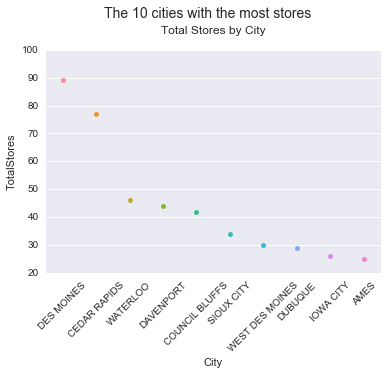

In [63]:
for column in ["City"]:
    sns.swarmplot(x=column, y="TotalStores",  data=stores_bycity_df.head(10));
    sns.plt.title('Total Stores by City', y=1.05)
    sns.plt.suptitle('The 10 cities with the most stores', fontsize=14, y=1.05)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    

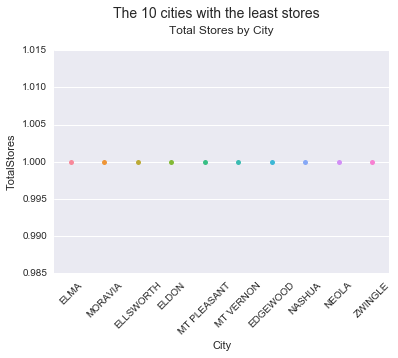

In [64]:
for column in ["City"]:
    sns.swarmplot(x=column, y="TotalStores",  data=stores_bycity_df.tail(10));
    sns.plt.title('Total Stores by City', y=1.05)
    sns.plt.suptitle('The 10 cities with the least stores', fontsize=14, y=1.05)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)

In [65]:
best_stores_2015_county.columns

Index([u'County', u'Year', u'TotalNoStores', u'TotalSaleDollars',
       u'TotalBottlesSold', u'TotalProfitDollars'],
      dtype='object')

In [66]:
best_stores_2015_county['County'].head(10).values

array(['Polk', 'Linn', 'Johnson', 'Black Hawk', 'Scott', 'Pottawattamie',
       'Woodbury', 'Dubuque', 'Story', 'Iowa'], dtype=object)

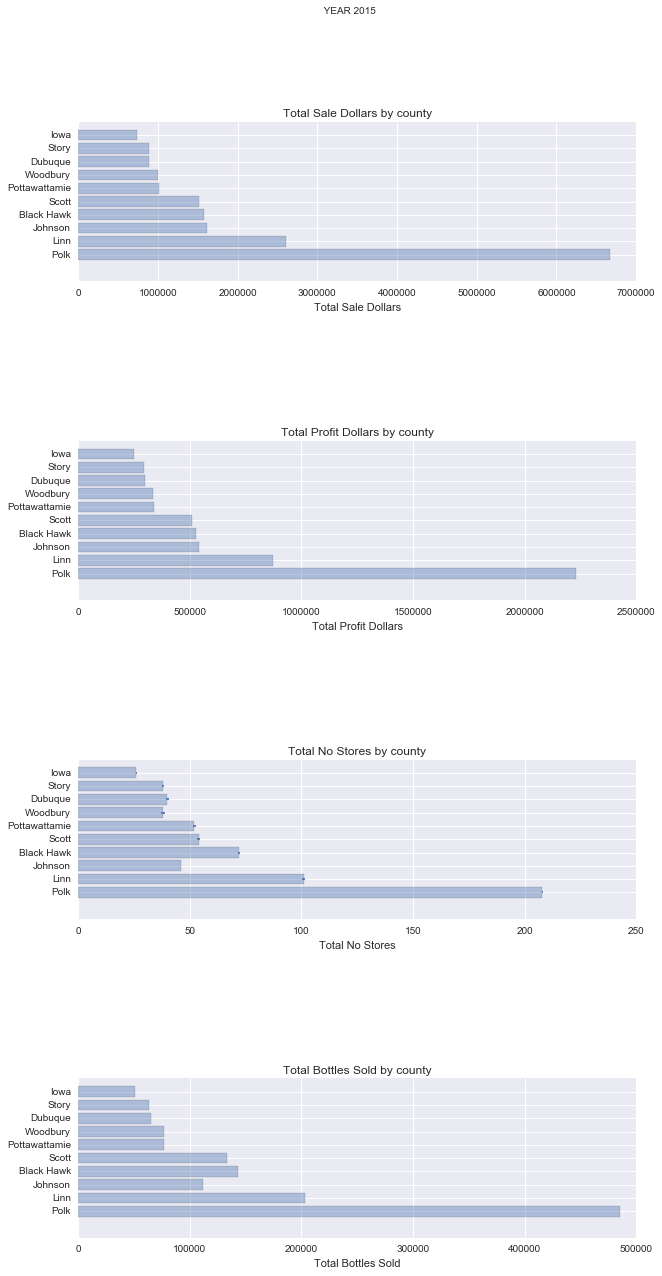

In [67]:
#Plotting 10 most profitable counties  

fig, axes = plt.subplots(4,1, figsize=(10,20))

plt.subplot(411)
plt.subplots_adjust(hspace=1)
counties = best_stores_2015_county['County'].head(10).values
y_pos = np.arange(len(counties))
performance = best_stores_2015_county['TotalSaleDollars'].head(10).values
error = np.random.rand(len(counties))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, counties)
plt.xlabel('Total Sale Dollars')
plt.title('Total Sale Dollars by county')
plt.suptitle(' YEAR 2015')

plt.subplot(412)

counties = best_stores_2015_county['County'].head(10).values
y_pos = np.arange(len(counties))
performance = best_stores_2015_county['TotalProfitDollars'].head(10).values
error = np.random.rand(len(counties))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, counties)
plt.xlabel('Total Profit Dollars')
plt.title('Total Profit Dollars by county')

plt.subplot(413)

counties = best_stores_2015_county['County'].head(10).values
y_pos = np.arange(len(counties))
performance = best_stores_2015_county['TotalNoStores'].head(10).values
error = np.random.rand(len(counties))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, counties)
plt.xlabel('Total No Stores')
plt.title('Total No Stores by county')

plt.subplot(414)

counties = best_stores_2015_county['County'].head(10).values
y_pos = np.arange(len(counties))
performance = best_stores_2015_county['TotalBottlesSold'].head(10).values
error = np.random.rand(len(counties))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, counties)
plt.xlabel('Total Bottles Sold')
plt.title('Total Bottles Sold by county')
#County	Year	TotalNoStores	TotalSaleDollars	TotalBottlesSold	TotalProfitDollars
#Polk	2015	206	6402210.51	474031	2139175.98

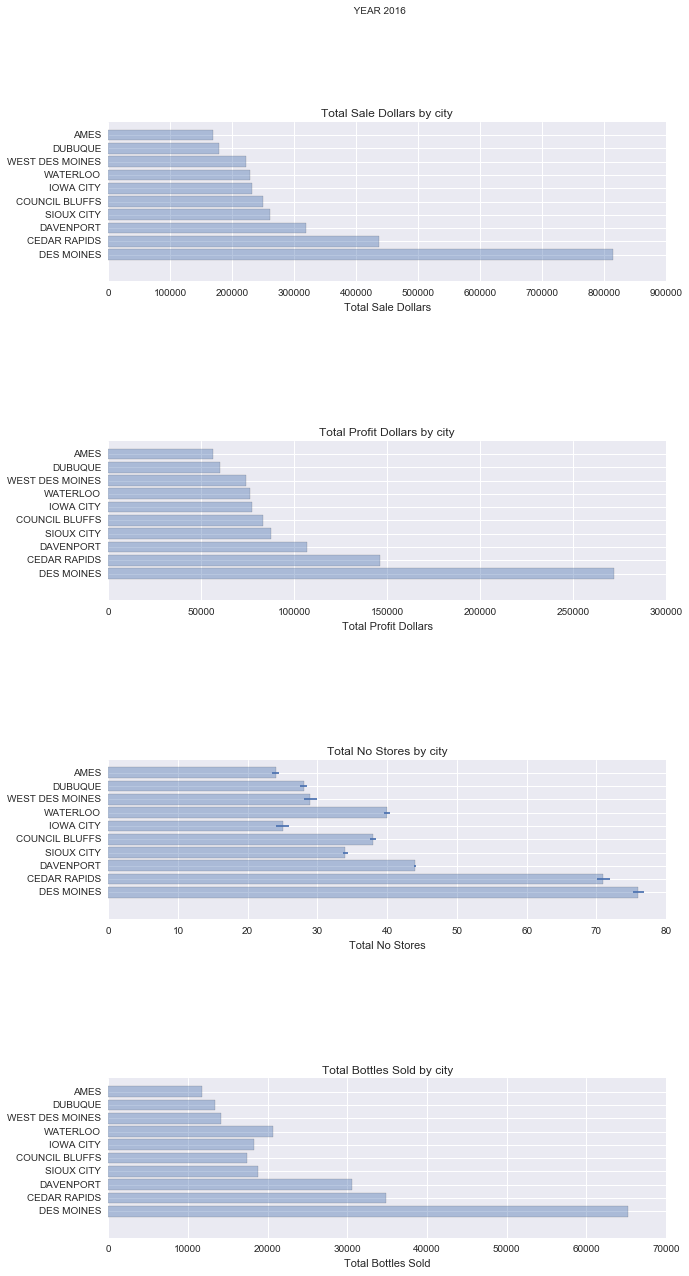

In [68]:
#Plotting 10 most profitable cities

fig, axes = plt.subplots(4,1, figsize=(10,20))

plt.subplot(411)
plt.subplots_adjust(hspace=1)
cities = best_stores_2016_city['City'].head(10).values
y_pos = np.arange(len(cities))
performance = best_stores_2016_city['TotalSaleDollars'].head(10).values
error = np.random.rand(len(cities))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, cities)
plt.xlabel('Total Sale Dollars')
plt.title('Total Sale Dollars by city')
plt.suptitle(' YEAR 2016')

plt.subplot(412)

cities = best_stores_2016_city['City'].head(10).values
y_pos = np.arange(len(cities))
performance = best_stores_2016_city['TotalProfitDollars'].head(10).values
error = np.random.rand(len(cities))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, cities)
plt.xlabel('Total Profit Dollars')
plt.title('Total Profit Dollars by city')

plt.subplot(413)

cities = best_stores_2016_city['City'].head(10).values
y_pos = np.arange(len(cities))
performance = best_stores_2016_city['TotalNoStores'].head(10).values
error = np.random.rand(len(cities))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, cities)
plt.xlabel('Total No Stores')
plt.title('Total No Stores by city')

plt.subplot(414)

cities = best_stores_2016_city['City'].head(10).values
y_pos = np.arange(len(cities))
performance = best_stores_2016_city['TotalBottlesSold'].head(10).values
error = np.random.rand(len(cities))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, cities)
plt.xlabel('Total Bottles Sold')
plt.title('Total Bottles Sold by city')




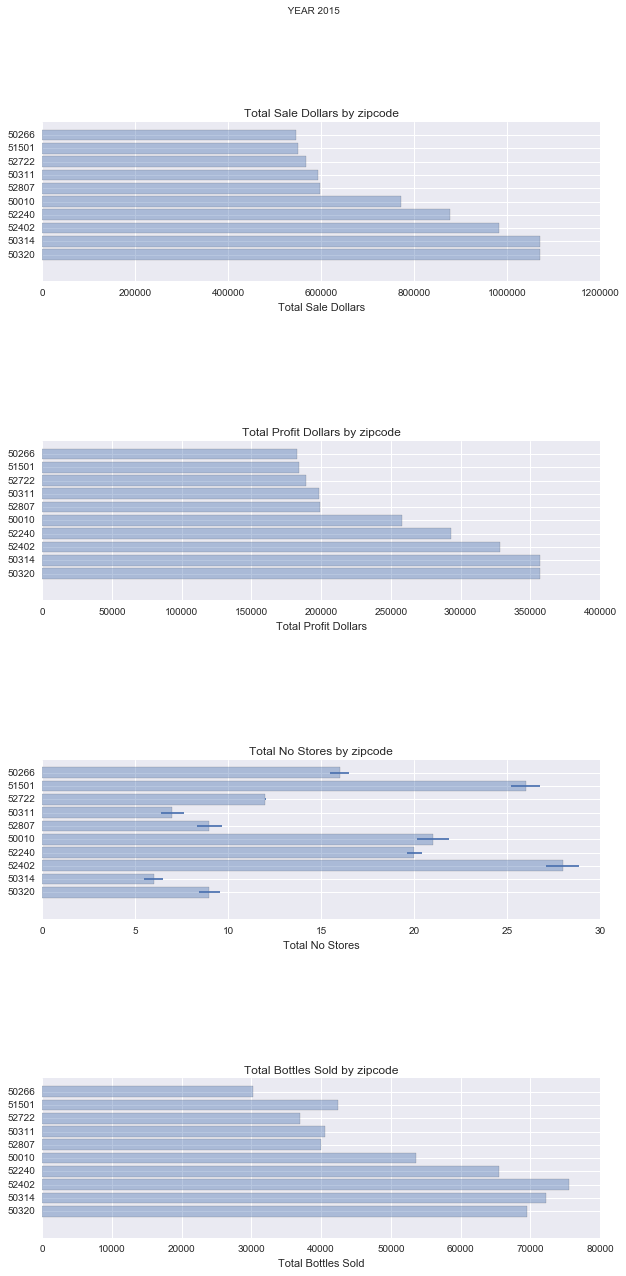

In [69]:
fig, axes = plt.subplots(4,1, figsize=(10,20))

plt.subplot(411)
plt.subplots_adjust(hspace=1)
zipcodes = best_stores_2015_ZipCode['ZipCode'].head(10).values
y_pos = np.arange(len(zipcodes))
performance = best_stores_2015_ZipCode['TotalSaleDollars'].head(10).values
error = np.random.rand(len(zipcodes))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, zipcodes)
plt.xlabel('Total Sale Dollars')
plt.title('Total Sale Dollars by zipcode')
plt.suptitle(' YEAR 2015')

plt.subplot(412)

zipcodes = best_stores_2015_ZipCode['ZipCode'].head(10).values
y_pos = np.arange(len(zipcodes))
performance = best_stores_2015_ZipCode['TotalProfitDollars'].head(10).values
error = np.random.rand(len(zipcodes))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, zipcodes)
plt.xlabel('Total Profit Dollars')
plt.title('Total Profit Dollars by zipcode')

plt.subplot(413)

zipcodes = best_stores_2015_ZipCode['ZipCode'].head(10).values
y_pos = np.arange(len(zipcodes))
performance = best_stores_2015_ZipCode['TotalNoStores'].head(10).values
error = np.random.rand(len(zipcodes))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, zipcodes)
plt.xlabel('Total No Stores')
plt.title('Total No Stores by zipcode')

plt.subplot(414)

zipcodes = best_stores_2015_ZipCode['ZipCode'].head(10).values
y_pos = np.arange(len(zipcodes))
performance = best_stores_2015_ZipCode['TotalBottlesSold'].head(10).values
error = np.random.rand(len(zipcodes))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, zipcodes)
plt.xlabel('Total Bottles Sold')
plt.title('Total Bottles Sold by zipcode')



In [70]:
best_stores_2015_county.describe()

Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
count    99.0      99.000000      9.900000e+01         99.000000   
mean   2015.0      13.858586      2.881540e+05      21970.808081   
std       0.0      24.805780      7.619340e+05      56792.468289   
min    2015.0       1.000000      1.656080e+03        129.000000   
25%    2015.0       5.000000      4.138413e+04       3675.500000   
50%    2015.0       7.000000      8.378447e+04       6174.000000   
75%    2015.0      12.500000      1.904154e+05      14155.000000   
max    2015.0     208.000000      6.667881e+06     485742.000000   

       TotalProfitDollars  
count        9.900000e+01  
mean         9.636525e+04  
std          2.546105e+05  
min          5.522100e+02  
25%          1.383764e+04  
50%          2.797147e+04  
75%          6.381170e+04  
max          2.228286e+06

In [71]:
best_stores_2016_county.describe()

Year  TotalNoStores  TotalSaleDollars  TotalBottlesSold  \
count    99.0      99.000000      9.900000e+01         99.000000   
mean   2016.0      13.222222      6.464139e+04       5046.101010   
std       0.0      23.023305      1.669524e+05      12924.390948   
min    2016.0       1.000000      9.031800e+02         72.000000   
25%    2016.0       4.500000      1.073501e+04        808.500000   
50%    2016.0       7.000000      1.941314e+04       1575.000000   
75%    2016.0      12.000000      4.025825e+04       3004.000000   
max    2016.0     190.000000      1.453973e+06     110829.000000   

       TotalProfitDollars  
count           99.000000  
mean         21588.953737  
std          55707.230665  
min            301.140000  
25%           3587.360000  
50%           6485.110000  
75%          13508.860000  
max         485144.500000

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [73]:
df.head(3)

Date  StoreNumber         City  ZipCode  CountyNumber      County  \
0 2015-11-04         3717       SUMNER    50674             9      Bremer   
1 2016-03-02         2614    DAVENPORT    52807            82       Scott   
2 2016-02-11         2106  CEDAR FALLS    50613             7  Black Hawk   

   Category               CategoryName  VendorNumber  ItemNumber   ...    \
0   1051100           APRICOT BRANDIES            55       54436   ...     
1   1011100           BLENDED WHISKIES           395       27605   ...     
2   1011200  STRAIGHT BOURBON WHISKIES            65       19067   ...     

  StateBottleRetail  BottlesSold  SaleDollars  VolumeSoldLiters  \
0              6.75           12        81.00               9.0   
1             20.63            2        41.26               1.5   
2             18.89           24       453.36              24.0   

   VolumeSoldGallons  Year  Month  TotalDolBotStateCost  TotalDolBotStateRet  \
0               2.38  2015     11                 54.00                81.00   
1               0.40  2016      3                 27.50                41.26   
2               6.34  2016      2                302.16               453.36   

   Profit  
0   27.00  
1   13.76  
2  151.20  

[3 rows x 23 columns]

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [74]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [75]:
df.dtypes

Date                    datetime64[ns]
StoreNumber                      int64
City                            object
ZipCode                          int64
CountyNumber                     int64
County                          object
Category                         int64
CategoryName                    object
VendorNumber                     int64
ItemNumber                       int64
ItemDescription                 object
BottleVolumeml                   int64
StateBottleCost                float64
StateBottleRetail              float64
BottlesSold                      int64
SaleDollars                    float64
VolumeSoldLiters               float64
VolumeSoldGallons              float64
Year                             int64
Month                            int64
TotalDolBotStateCost           float64
TotalDolBotStateRet            float64
Profit                         float64
dtype: object

In [79]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#dfx = df[['CountyNumber', 'Category',\
#        'VendorNumber','ItemNumber', \
#         'BottleVolumeml','StateBottleCost',\
#         'VolumeSoldLiters','VolumeSoldGallons']]

#First tried first 3 month of 2015
#target_segment = df[(df['Year']==2015) & (df['Month'].isin([1,2,3]))]

#Second tried first 3 month of 2016
target_segment = df[(df['Year']==2016) & (df['Month'].isin([1,2,3]))]



dfx = target_segment[['ZipCode', 'BottleVolumeml','StateBottleCost',
         'VolumeSoldLiters','VolumeSoldGallons']]

#TARGET

targets = target_segment[[ 'SaleDollars',\
          'StateBottleRetail','BottlesSold']]

#targets = target_segment[['StateBottleRetail']]

#df[df['Month'].isin([1,2,3])]['Year'].unique()
#df[df['Year']==2015]['Month'].unique()

#df.columns

In [80]:
target_segment.head(3)

Date  StoreNumber         City  ZipCode  CountyNumber      County  \
1 2016-03-02         2614    DAVENPORT    52807            82       Scott   
2 2016-02-11         2106  CEDAR FALLS    50613             7  Black Hawk   
3 2016-02-03         2501         AMES    50010            85       Story   

   Category               CategoryName  VendorNumber  ItemNumber   ...    \
1   1011100           BLENDED WHISKIES           395       27605   ...     
2   1011200  STRAIGHT BOURBON WHISKIES            65       19067   ...     
3   1071100         AMERICAN COCKTAILS           395       59154   ...     

  StateBottleRetail  BottlesSold  SaleDollars  VolumeSoldLiters  \
1             20.63            2        41.26               1.5   
2             18.89           24       453.36              24.0   
3             14.25            6        85.50              10.5   

   VolumeSoldGallons  Year  Month  TotalDolBotStateCost  TotalDolBotStateRet  \
1               0.40  2016      3                 27.50                41.26   
2               6.34  2016      2                302.16               453.36   
3               2.77  2016      2                 57.00                85.50   

   Profit  
1   13.76  
2  151.20  
3   28.50  

[3 rows x 23 columns]

In [81]:
df['ZipCode'].describe()

count    270955.000000
mean      51264.417663
std         988.539486
min       50002.000000
25%       50315.000000
50%       51101.000000
75%       52310.000000
max       56201.000000
Name: ZipCode, dtype: float64

In [82]:
dfx.head(3)

ZipCode  BottleVolumeml  StateBottleCost  VolumeSoldLiters  \
1    52807             750            13.75               1.5   
2    50613            1000            12.59              24.0   
3    50010            1750             9.50              10.5   

   VolumeSoldGallons  
1               0.40  
2               6.34  
3               2.77

In [83]:
targets.head(3)

SaleDollars  StateBottleRetail  BottlesSold
1        41.26              20.63            2
2       453.36              18.89           24
3        85.50              14.25            6

Let's see how is  the distribution of each variable.

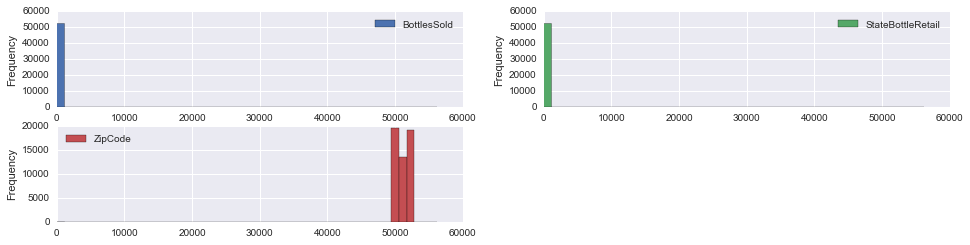

In [84]:
target_segment[['BottlesSold','StateBottleRetail', 'ZipCode']].plot(kind='hist', subplots = True, layout = (6,2), sharex = False, bins = 50, figsize = (16,12));

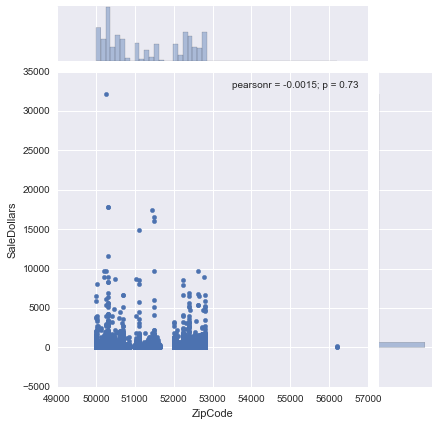

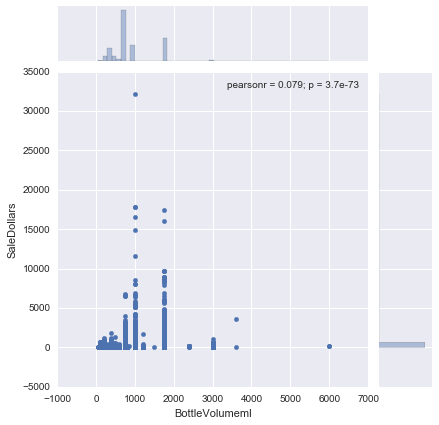

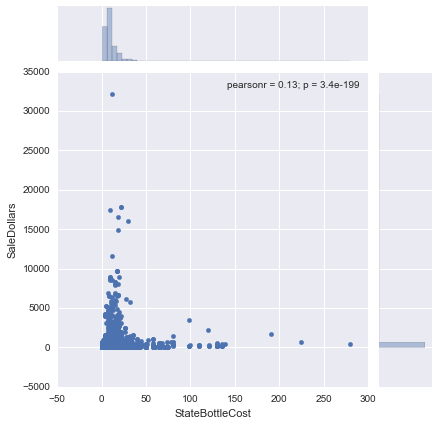

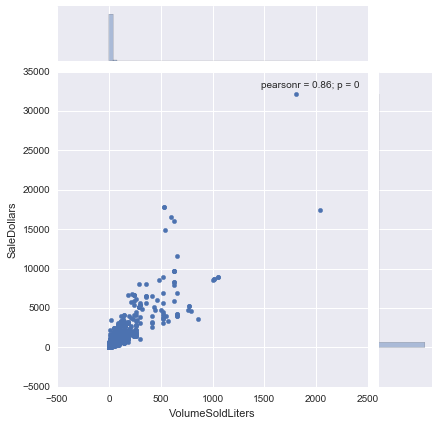

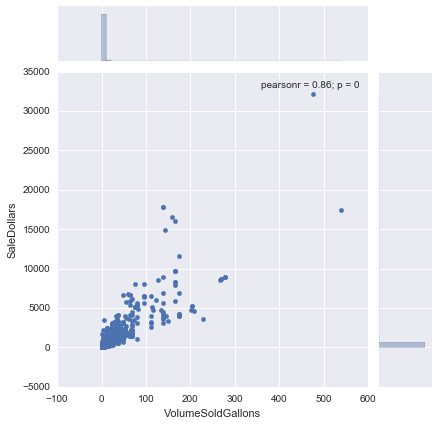

In [85]:
for iv in dfx.columns.values:
    sns.jointplot(x=dfx[iv], y=targets['SaleDollars'])  

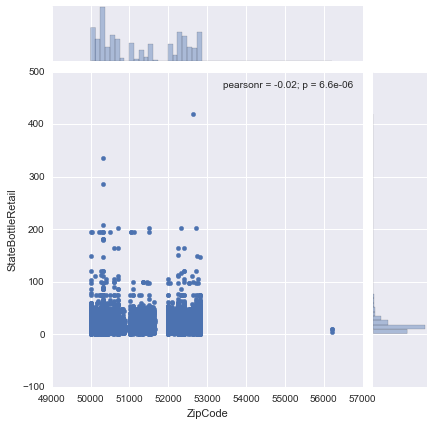

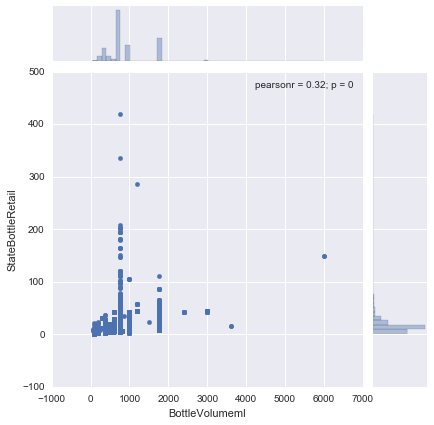

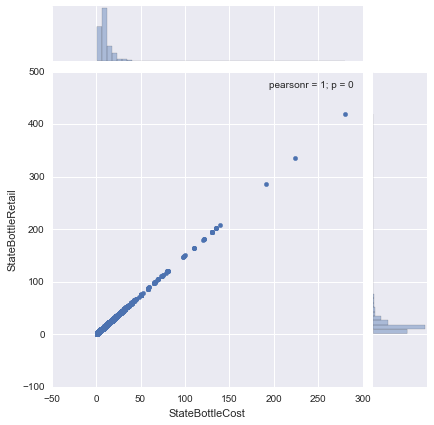

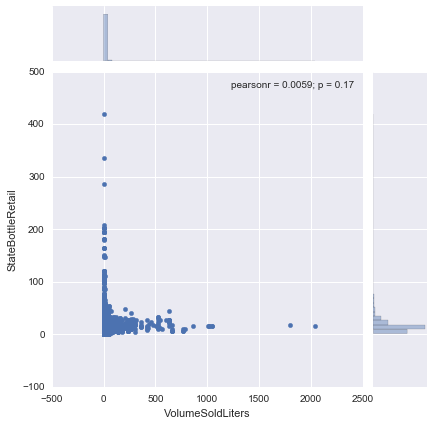

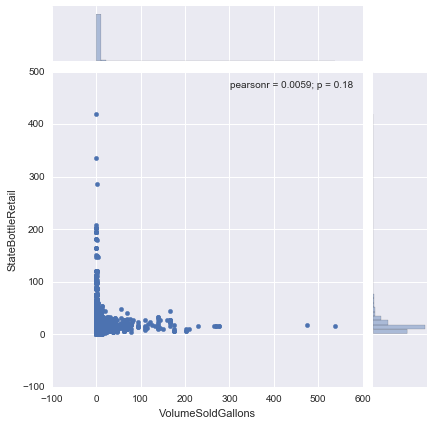

In [86]:
for iv in dfx.columns.values:
    sns.jointplot(x=dfx[iv], y=targets['StateBottleRetail'])  

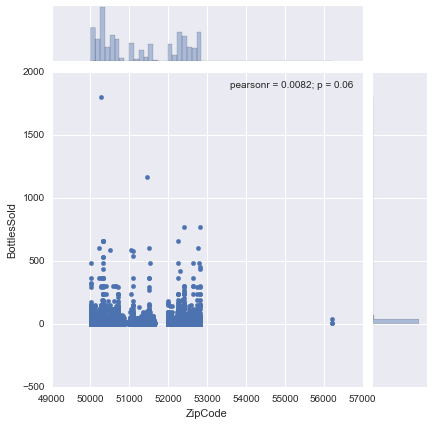

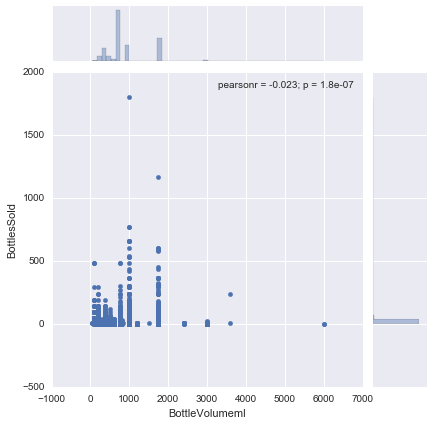

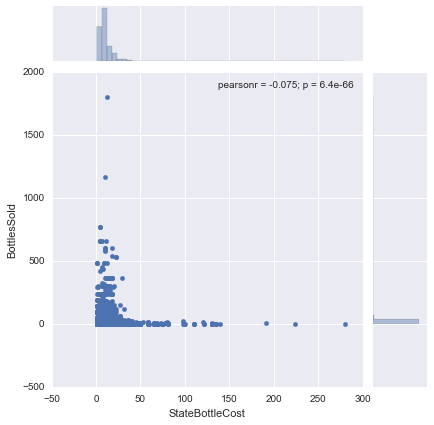

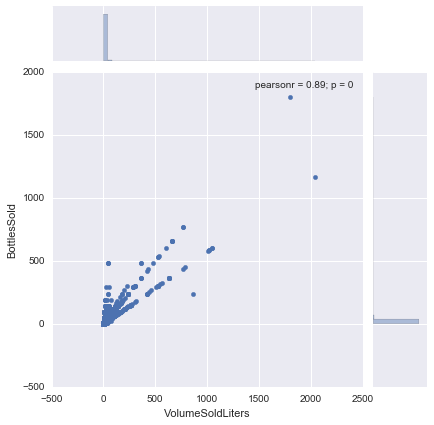

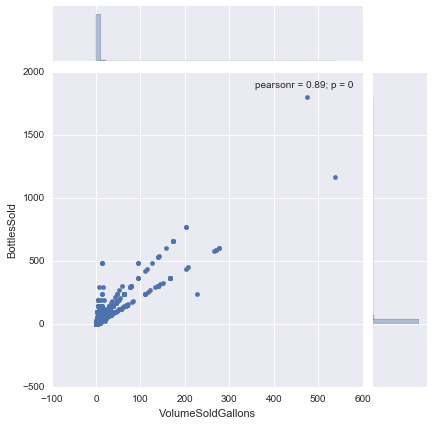

In [87]:
for iv in dfx.columns.values:
    sns.jointplot(x=dfx[iv], y=targets['BottlesSold'])  

In [88]:
#Model predicting SalesDollars with VolumeSoldLiters as the predictor

lm = linear_model.LinearRegression()

X = dfx[["VolumeSoldLiters"]]
y = targets["SaleDollars"]

model = lm.fit(X, y)
predictions = model.predict(X)

In [89]:
X.min()

VolumeSoldLiters    0.1
dtype: float64

In [90]:
print(dfx['VolumeSoldLiters'][:5]) # The first 5 predictor values.
print(targets['SaleDollars'][:5]) # The first 5 outcome values.
print(predictions[:5]) # Our first 5 predictions, based on fitting a linear model SaleDollars ~ VolumeSoldLiters.

1      1.5
2     24.0
3     10.5
8      3.0
13     9.0
Name: VolumeSoldLiters, dtype: float64
1      41.26
2     453.36
3      85.50
8      68.96
13    180.00
Name: SaleDollars, dtype: float64
[  39.51453946  303.86454521  145.25454176   57.13787318  127.63120805]


MSE: 34773.6322181


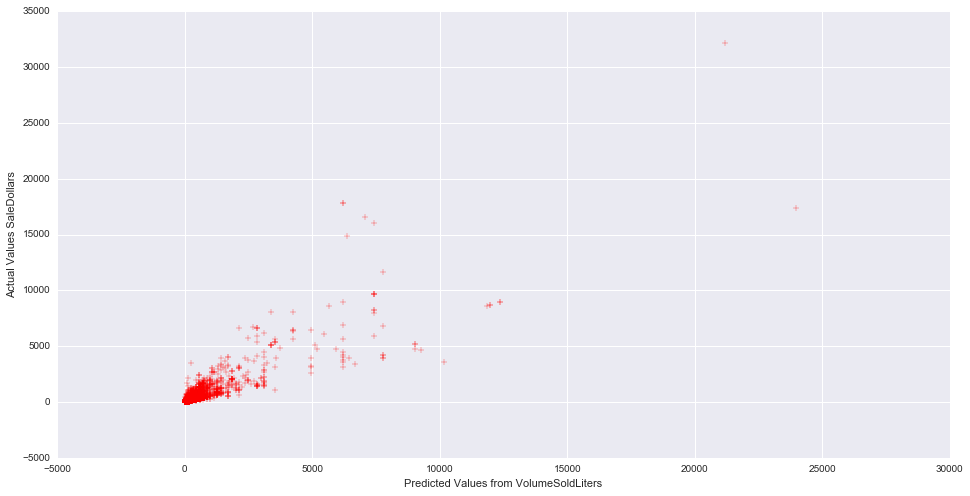

In [91]:
print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from VolumeSoldLiters")
plt.ylabel("Actual Values SaleDollars")
plt.show()

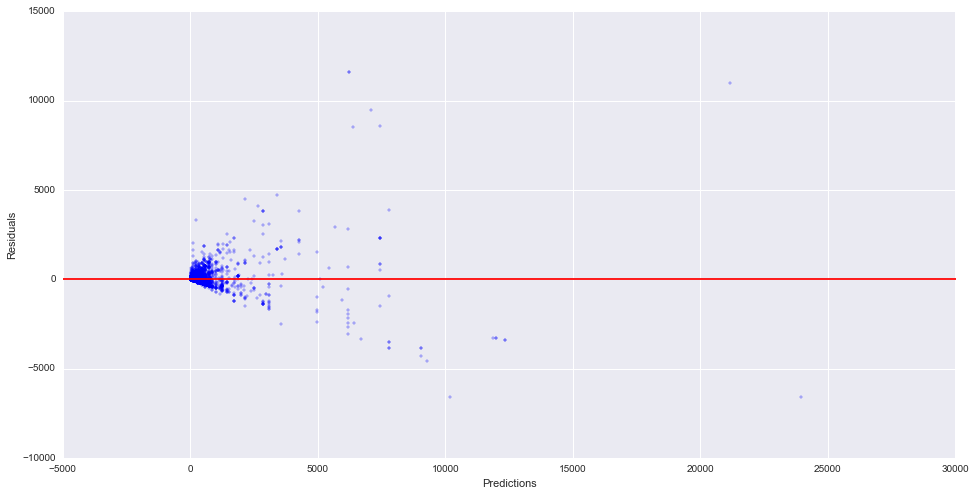

In [92]:
# Plot the residuals against y-hat. 
plt.figure(figsize=(16,8))
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r');
plt.xlabel("Predictions")
plt.ylabel("Residuals");

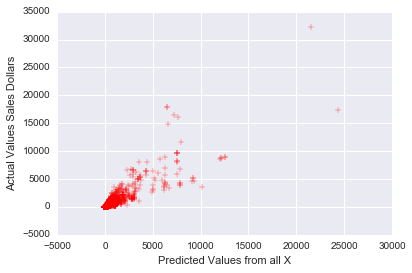

MSE: 31208.3762847


In [93]:
# Use the entire df of predictors as X
X = dfx
model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all X")
plt.ylabel("Actual Values Sales Dollars")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [94]:
#Model predicting BottlesSold with VolumeSoldLiters as the predictor

lm_bc = linear_model.LinearRegression()

X = dfx[["VolumeSoldLiters"]]
y = targets["BottlesSold"]

model = lm.fit(X, y)
predictions = model.predict(X)

MSE: 101.037416877


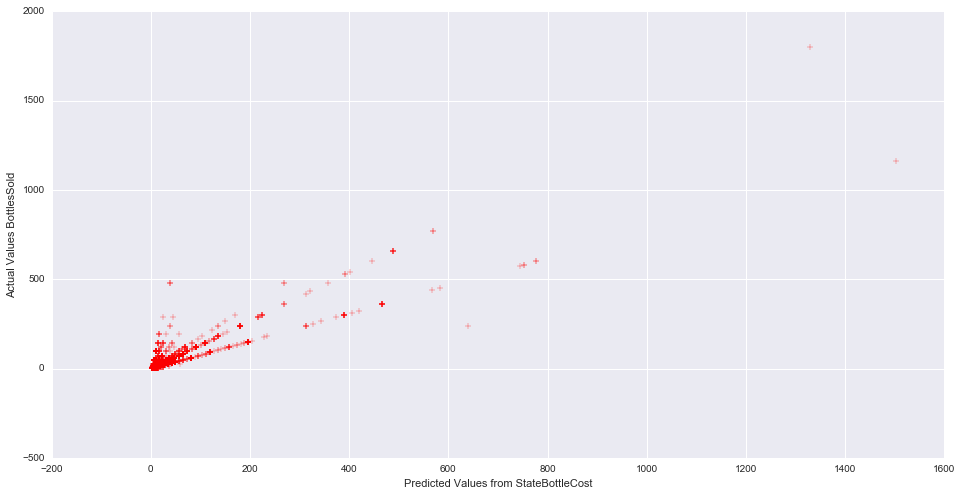

In [95]:
print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from StateBottleCost")
plt.ylabel("Actual Values BottlesSold")
plt.show()

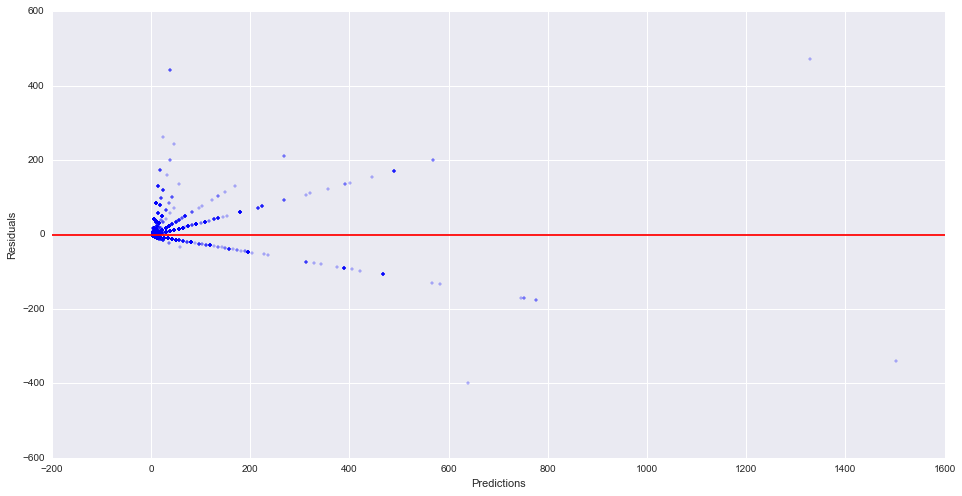

In [96]:
# Plot the residuals against y-hat. 
plt.figure(figsize=(16,8))
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r');
plt.xlabel("Predictions")
plt.ylabel("Residuals");

In [97]:
#Model predicting StateBottleRetail with StateBottleCost as the predictor

lm_br = linear_model.LinearRegression()

X = dfx[["StateBottleCost"]]
y = targets["StateBottleRetail"]

model = lm.fit(X, y)
predictions = model.predict(X)

MSE: 0.00271270155847


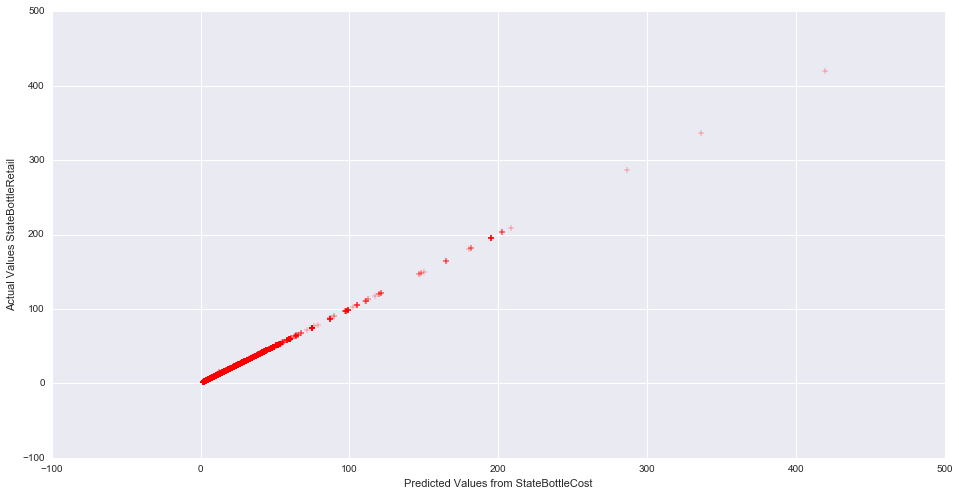

In [98]:
print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from StateBottleCost")
plt.ylabel("Actual Values StateBottleRetail")
plt.show()

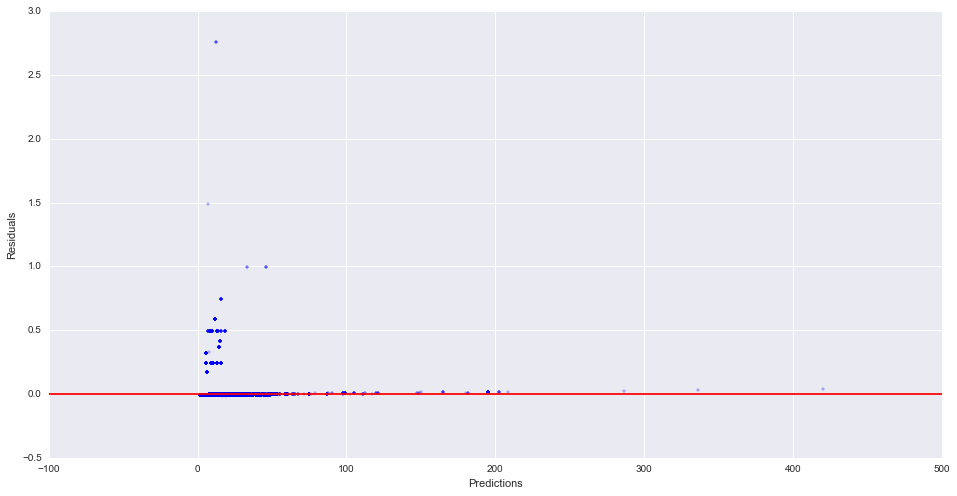

In [99]:
# Plot the residuals against y-hat. 
plt.figure(figsize=(16,8))
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r');
plt.xlabel("Predictions")
plt.ylabel("Residuals");

In [100]:
print(dfx['StateBottleCost'][:5]) # The first 5 predictor values.
print(targets['StateBottleRetail'][:5]) # The first 5 outcome values.
print(predictions[:5]) # Our first 5 predictions, based on fitting a linear model SaleDollars ~ VolumeSoldLiters.

1     13.75
2     12.59
3      9.50
8     11.49
13    10.00
Name: StateBottleCost, dtype: float64
1     20.63
2     18.89
3     14.25
8     17.24
13    15.00
Name: StateBottleRetail, dtype: float64
[ 20.63219562  18.89239564  14.25792847  17.24258532  15.00784226]


In [101]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = dfx
y = targets['SaleDollars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50)

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)

mse = mean_squared_error(y_test, pred)
print "MSE:", mse
print "Mean coefficient:", abs(lm.coef_).mean()

MSE: 30660.2699809
Mean coefficient: 155.028457191


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.